In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import pickle
import os

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 20})
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

mpl.rcParams['hist.bins'] = 100
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 2.5
mpl.rcParams['grid.alpha'] = 0.2

In [3]:
pth = '/home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/'

In [4]:
conv = 1e-27*0.389379304 # [GeV*cm^2]<-- conversion factor for xsec[GeV^-2] -> xsec[cm^2]

In [5]:
def read_xsec_from_dat_file(pth, name, ftype = '.dat'):
    
    filename = pth + name + ftype
    print ('reading file: ', filename)
    
    datContent = [i.strip().split() 
                  for i in open(filename).readlines()]
    
    dat_nedges = int(datContent[0][0])
    dat_st_bins = int(datContent[0][2])
    dat_end_bins = int(datContent[0][3])

    dat_lgE_bins = np.linspace(dat_st_bins, dat_end_bins, dat_nedges)
    dat_lgE_bin_centers = dat_lgE_bins[:-1]# + (dat_lgE_bins[1] - dat_lgE_bins[0])/2.

    dat_xsec = [float(datContent[i][0]) for i in range(1, len(datContent)-1)]
    dat_xsec = np.array(dat_xsec) * 1.0e-27

    return dat_lgE_bin_centers, dat_xsec

def read_list_xsec_dat_files(pth, names, ftype='.dat'):
    
    d = {}
    for i in range(len(names)):
        name = names[i]
        
        dat_lgE_bin_centers, dat_xsec = read_xsec_from_dat_file(pth, name, ftype=ftype)
        dat_xsec_per_E = dat_xsec/10.**(dat_lgE_bin_centers)
        
        d[name] = {'lgE':dat_lgE_bin_centers, 'xsec':dat_xsec, 'xsec_per_E':dat_xsec_per_E}
        
    return d

In [6]:
def read_xsec_from_dat_file(pth, name, ftype = '.dat'):
    
    filename = pth + name + ftype
    print ('reading file: ', filename)
    
    datContent = [i.strip().split() 
                  for i in open(filename).readlines()]
    
    dat_nedges = int(datContent[0][0])
    dat_st_bins = int(datContent[0][2])
    dat_end_bins = int(datContent[0][3])

    dat_lgE_bins = np.linspace(dat_st_bins, dat_end_bins, dat_nedges)
    dat_lgE_bin_centers = dat_lgE_bins[:-1]# + (dat_lgE_bins[1] - dat_lgE_bins[0])/2.

    dat_xsec = [float(datContent[i][0]) for i in range(1, len(datContent)-1)]
    dat_xsec = np.array(dat_xsec) * 1.0e-27

    return dat_lgE_bin_centers, dat_xsec

def read_list_xsec_dat_files(pth, names, ftype='.dat'):
    
    d = {}
    for i in range(len(names)):
        name = names[i]
        
        dat_lgE_bin_centers, dat_xsec = read_xsec_from_dat_file(pth, name, ftype=ftype)
        dat_xsec_per_E = dat_xsec/10.**(dat_lgE_bin_centers)
        
        d[name] = {'lgE':dat_lgE_bin_centers, 'xsec':dat_xsec, 'xsec_per_E':dat_xsec_per_E}
        
    return d

In [7]:
pth_csms_dat = '/home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/'
names_csms_dat = ['total_nu_CC_p_NLO_HERAPDF1.5NLO_EIG', 'total_nu_NC_p_NLO_HERAPDF1.5NLO_EIG', 
                  'total_nubar_NC_p_NLO_HERAPDF1.5NLO_EIG', 'total_nubar_CC_p_NLO_HERAPDF1.5NLO_EIG',
                  'total_nu_CC_n_NLO_HERAPDF1.5NLO_EIG', 'total_nu_NC_n_NLO_HERAPDF1.5NLO_EIG', 
                  'total_nubar_NC_n_NLO_HERAPDF1.5NLO_EIG', 'total_nubar_CC_n_NLO_HERAPDF1.5NLO_EIG',
                  'total_nu_CC_iso_NLO_HERAPDF1.5NLO_EIG', 'total_nu_NC_iso_NLO_HERAPDF1.5NLO_EIG', 
                  'total_nubar_NC_iso_NLO_HERAPDF1.5NLO_EIG', 'total_nubar_CC_iso_NLO_HERAPDF1.5NLO_EIG']

xsec_csms0 = read_list_xsec_dat_files(pth=pth_csms_dat, names=names_csms_dat)

reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nu_CC_p_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nu_NC_p_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nubar_NC_p_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nubar_CC_p_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nu_CC_n_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nu_NC_n_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nubar_NC_n_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_contrib/xsec/csms/total_nubar_CC_n_NLO_HERAPDF1.5NLO_EIG.dat
reading file:  /home/mliubar/scratch/jupyter_plots_xsec_q_co

In [8]:
xsec_csms = {'tgt':[], 'nu':[], 'CC':[], 'lgE':[], 'xsec':[], 'xsec_per_E':[]}

for k in xsec_csms0.keys():
    
        print (k)
    
        st_nu = k.find('total_') +len('total_')
        end_nu = st_nu + k[st_nu:].find('_')
        nustr = k[st_nu:end_nu]
        print (k[st_nu:])
        if nustr == 'nu':
            nu = 1
        elif nustr == 'nubar':
            nu = -1
        else:
            print ('error! nu isnt nu or nubar: ', nustr)
        xsec_csms['nu'].append(nu)
        print (nustr, nu)
        
        st_curr = k.find(nustr+'_') + len(nustr+'_')
        end_curr = st_curr + k[st_curr:].find('_')
        if k[st_curr:end_curr] == 'CC':
            cc = 1
        elif k[st_curr:end_curr] == 'NC':
            cc = 0
        else:
            cc = -1
        xsec_csms['CC'].append(cc)        
        print (k[st_curr:end_curr], cc)
    
        st_tgt = end_curr + 1
        end_tgt = st_tgt + k[st_tgt:].find('_')
        if k[st_tgt:end_tgt] == 'p':
            tgt = 2212
        elif k[st_tgt:end_tgt] == 'n':
            tgt = 2112
        elif k[st_tgt:end_tgt] == 'iso':
            tgt = 0
        else:
            print ('error! tgt wasnt found correctly: ', k[st_tgt])
        xsec_csms['tgt'].append(tgt)
        print (tgt)

        xsec_csms['lgE'].append(xsec_csms0[k]['lgE'])
        xsec_csms['xsec'].append(xsec_csms0[k]['xsec'])
        xsec_csms['xsec_per_E'].append(xsec_csms0[k]['xsec_per_E'])
        
for k in xsec_csms.keys():
    xsec_csms[k] = np.array(xsec_csms[k])

total_nu_CC_p_NLO_HERAPDF1.5NLO_EIG
nu_CC_p_NLO_HERAPDF1.5NLO_EIG
nu 1
CC 1
2212
total_nu_NC_p_NLO_HERAPDF1.5NLO_EIG
nu_NC_p_NLO_HERAPDF1.5NLO_EIG
nu 1
NC 0
2212
total_nubar_NC_p_NLO_HERAPDF1.5NLO_EIG
nubar_NC_p_NLO_HERAPDF1.5NLO_EIG
nubar -1
NC 0
2212
total_nubar_CC_p_NLO_HERAPDF1.5NLO_EIG
nubar_CC_p_NLO_HERAPDF1.5NLO_EIG
nubar -1
CC 1
2212
total_nu_CC_n_NLO_HERAPDF1.5NLO_EIG
nu_CC_n_NLO_HERAPDF1.5NLO_EIG
nu 1
CC 1
2112
total_nu_NC_n_NLO_HERAPDF1.5NLO_EIG
nu_NC_n_NLO_HERAPDF1.5NLO_EIG
nu 1
NC 0
2112
total_nubar_NC_n_NLO_HERAPDF1.5NLO_EIG
nubar_NC_n_NLO_HERAPDF1.5NLO_EIG
nubar -1
NC 0
2112
total_nubar_CC_n_NLO_HERAPDF1.5NLO_EIG
nubar_CC_n_NLO_HERAPDF1.5NLO_EIG
nubar -1
CC 1
2112
total_nu_CC_iso_NLO_HERAPDF1.5NLO_EIG
nu_CC_iso_NLO_HERAPDF1.5NLO_EIG
nu 1
CC 1
0
total_nu_NC_iso_NLO_HERAPDF1.5NLO_EIG
nu_NC_iso_NLO_HERAPDF1.5NLO_EIG
nu 1
NC 0
0
total_nubar_NC_iso_NLO_HERAPDF1.5NLO_EIG
nubar_NC_iso_NLO_HERAPDF1.5NLO_EIG
nubar -1
NC 0
0
total_nubar_CC_iso_NLO_HERAPDF1.5NLO_EIG
nubar_CC_iso_NL

In [5]:
with open(os.path.join(pth,'nutau_xsec_models.pckl'), 'rb') as f:
    nutau_xsec = pickle.load(f, encoding='latin1')
    
with open(os.path.join(pth,'SuperK_nutau_xsec.pckl'), 'rb') as f:
    sk_xsec = pickle.load(f, encoding='latin1')

In [6]:
crls = {'Paschos':'lime', 'Nuance':'magenta', 'Hagiwara':'blue', 'Kretzer':'red'}
ls   = {'Paschos':'--', 'Nuance':':', 'Hagiwara':'--', 'Kretzer':'-'}

In [13]:
def plot_ind_iso(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det='', linestyle='-'):
    with open(os.path.join(pth,'GENIE_2_12_8_water_splines_highen_fits_SUM.pckl'), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    if 'int_hedis' in genie.keys():
        gen = hedis_model+'(HEDIS)'
    else:
        gen = 'GENIE'+genie_det
        
    tgt_p = tgt_by_Npdg(2212)
    tgt_n = tgt_by_Npdg(2112)
    print (tgt_p, tgt_n)

    ind_base0 = (genie['pdg']==pdg)*\
    (genie['CC']==CC)
    
#     ind_base0_numu = (genie['pdg']==pdg)*\
#     (genie['CC']==CC)
    
    ind_base = ind_base0*(((genie['hitN']==2212)*(genie['tgt']==tgt_p))^\
                          ((genie['hitN']==2112)*(genie['tgt']==tgt_n)))
    
#     ind_base_numu = ind_base0_numu*(((genie['hitN']==2212)*(genie['tgt']==tgt_p))^\
#                           ((genie['hitN']==2112)*(genie['tgt']==tgt_n)))
    
    f = 1.5e-39/genie['E_fit']**0.5
    
    ax.plot(genie['E_fit'], np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.+f,
            c='orange', linestyle=linestyle, label=r'GENIE+$1.5\cdot 10^{-39}/\sqrt{E}$'+genie_det)
    
    ax.plot(genie['E_fit'], np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.,
            c='darkorange', linestyle=linestyle, label=gen)
    
    ax.plot(genie['E_fit'], np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.-f, 
            c='orange', linestyle=linestyle, label='GENIE-$1.5\cdot 10^{-39}/\sqrt{E}$'+genie_det)
    
#     ax.plot(genie['E_fit'], 
#             (np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.+f)/np.sum(genie['xsec_fits'][ind_base_numu]),
#             c='orange', linestyle=linestyle, label=r'GENIE+$1.5\cdot 10^{-39}/\sqrt{E}$'+genie_det)
    
    
    return 0

In [8]:
def plot_ind_iso(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det='', linestyle='-'):
    with open(os.path.join(pth,'GENIE_2_12_8_water_splines_highen_fits_SUM.pckl'), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    if 'int_hedis' in genie.keys():
        gen = hedis_model+'(HEDIS)'
    else:
        gen = 'GENIE'+genie_det
        
    tgt_p = tgt_by_Npdg(2212)
    tgt_n = tgt_by_Npdg(2112)
    print (tgt_p, tgt_n)

    ind_base0 = (genie['pdg']==-16)*\
    (genie['CC']==CC)
    
    ind_base0_numu = (genie['pdg']==-14)*\
    (genie['CC']==CC)
    
    ind_base = ind_base0*(((genie['hitN']==2212)*(genie['tgt']==tgt_p))^\
                          ((genie['hitN']==2112)*(genie['tgt']==tgt_n)))
    
    ind_base_numu = ind_base0_numu*(((genie['hitN']==2212)*(genie['tgt']==tgt_p))^\
                          ((genie['hitN']==2112)*(genie['tgt']==tgt_n)))
    
    f = 1.5e-39/genie['E_fit']**0.5
    
#     ax.plot(genie['E_fit'], np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.+f,
#             c='orange', linestyle=linestyle, label=r'GENIE+$1.5\cdot 10^{-39}/\sqrt{E}$'+genie_det)
    
#     ax.plot(genie['E_fit'], np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.,
#             c='darkorange', linestyle=linestyle, label=gen)
    
#     ax.plot(genie['E_fit'], np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.-f, 
#             c='orange', linestyle=linestyle, label='GENIE-$1.5\cdot 10^{-39}/\sqrt{E}$'+genie_det)

    ax.plot(np.log10(genie['E_fit']), 
            (np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.)/(np.sum(genie['xsec_fits'][ind_base_numu], axis=0)*conv/2.),
            c='green', linestyle=linestyle, label=r'$\frac{\bar{\nu}_{\tau}}{\bar{\nu}_{\mu}}$')

    ax.plot(np.log10(genie['E_fit']), 
            (np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.+f)/(np.sum(genie['xsec_fits'][ind_base_numu], axis=0)*conv/2.),
            c='orange', linestyle=linestyle, label=r'$\frac{\bar{\nu}_{\tau}+1.5\cdot 10^{-39}/\sqrt{E}}{\bar{\nu}_{\mu}}$')
    
    
    return 0

In [18]:
def plot_ind_iso_mult(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det='', linestyle='-'):
    with open(os.path.join(pth,'GENIE_2_12_8_water_splines_highen_fits_SUM.pckl'), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    if 'int_hedis' in genie.keys():
        gen = hedis_model+'(HEDIS)'
    else:
        gen = 'GENIE'+genie_det
        
    tgt_p = tgt_by_Npdg(2212)
    tgt_n = tgt_by_Npdg(2112)
    print (tgt_p, tgt_n)

    ind_base0 = (genie['pdg']==pdg)*\
    (genie['CC']==CC)
    
#     ind_base0_numu = (genie['pdg']==-14)*\
#     (genie['CC']==CC)
    
    ind_base = ind_base0*(((genie['hitN']==2212)*(genie['tgt']==tgt_p))^\
                          ((genie['hitN']==2112)*(genie['tgt']==tgt_n)))
    
#     ind_base_numu = ind_base0_numu*(((genie['hitN']==2212)*(genie['tgt']==tgt_p))^\
#                           ((genie['hitN']==2112)*(genie['tgt']==tgt_n)))
    
    f = 1.5e-39/genie['E_fit']**0.5
    
    r_plus = 1. + f/(np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.)
    r_minus = 1. - f/(np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.)

    ax.plot(genie['E_fit'], np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.+f,
            c='orange', linestyle=linestyle, label=r'GENIE+$1.5\cdot 10^{-39}/\sqrt{E}$'+genie_det)
    
    ax.plot(genie['E_fit'], np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.,
            c='darkorange', linestyle=linestyle, label=gen)
    
    ax.plot(genie['E_fit'], np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.-f, 
            c='orange', linestyle=linestyle, label='GENIE-$1.5\cdot 10^{-39}/\sqrt{E}$'+genie_det)
    
    ax.plot(genie['E_fit'], np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.*r_plus,
            c='m', linestyle='-.', label=r'GENIE*r_plus'+genie_det)
    
    ax.plot(genie['E_fit'], np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.*r_minus,
            c='m', linestyle='-.', label=r'GENIE*r_minus'+genie_det)
    
    return 0

In [105]:
with open(os.path.join(pth,'GENIE_2_12_8_water_splines_highen_fits_SUM.pckl'), 'rb') as f:
    genie = pickle.load(f, encoding='latin1')
for k in genie.keys():
    genie[k] = np.array(genie[k])
    
tgt_p = tgt_by_Npdg(2212)
tgt_n = tgt_by_Npdg(2112)
    
ind_base0 = (genie['CC']==1)    
ind_base = ind_base0*(((genie['hitN']==2212)*(genie['tgt']==tgt_p))^\
                      ((genie['hitN']==2112)*(genie['tgt']==tgt_n)))

E = genie['E_fit']
xsec_nutau    = np.sum(genie['xsec_fits'][ind_base*(genie['pdg']==16)], axis=0)*conv/2.*E
xsec_nutaubar = np.sum(genie['xsec_fits'][ind_base*(genie['pdg']==-16)], axis=0)*conv/2.*E
f = 1.5e-39*genie['E_fit']**0.5

r_plus = 1. + f/xsec_nutau
r_plus_bar = 1. + f/xsec_nutaubar
r_minus = 1. - f/xsec_nutau
r_minus_bar = 1. - f/xsec_nutaubar



/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


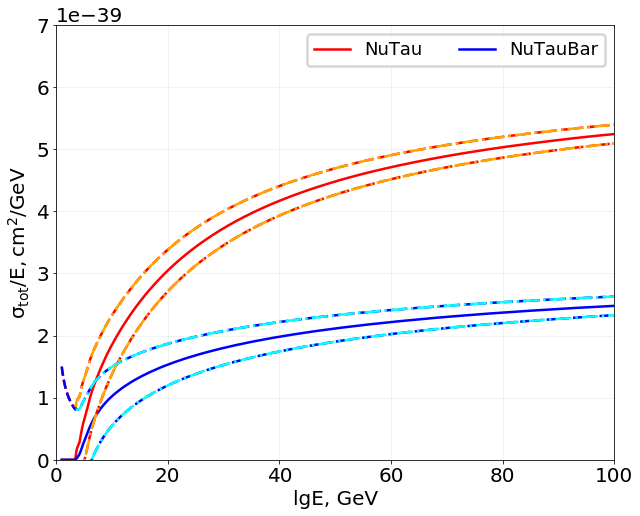

In [37]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
# title = get_title(pdg, hitN, CC)
# ax.set_title('NuTau CC', fontsize=18)
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

ax.set_xlim(0.,100.)
ax.set_ylim(0.,0.7e-38)

ax.plot(E, (xsec_nutau)/E, c='red', linestyle='-', label='NuTau')
ax.plot(E, (xsec_nutaubar)/E, c='blue', linestyle='-', label='NuTauBar')

ax.plot(E, (xsec_nutau+f)/E, c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar+f)/E, c='blue', linestyle='--')

ax.plot(E, (xsec_nutau-f)/E, c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar-f)/E, c='blue', linestyle='--')

ax.plot(E, (xsec_nutau*r_plus)/E, c='orange', linestyle='-.')
ax.plot(E, (xsec_nutaubar*r_plus_bar)/E, c='cyan', linestyle='-.')

ax.plot(E, (xsec_nutau*r_minus)/E, c='orange', linestyle='-.')
ax.plot(E, (xsec_nutaubar*r_minus_bar)/E, c='cyan', linestyle='-.')

plt.legend(ncol=2, fontsize=18)
plt.grid()
# plt.savefig('NuTauCC_GENIE_vs_models.pdf', dpi='figure')
plt.show()

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


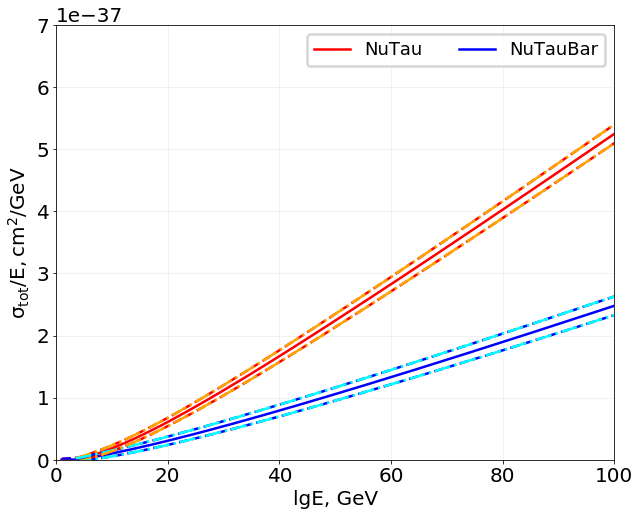

In [47]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
# title = get_title(pdg, hitN, CC)
# ax.set_title('NuTau CC', fontsize=18)
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

ax.set_xlim(0.,100.)
ax.set_ylim(0.,0.7e-36)

ax.plot(E, (xsec_nutau), c='red', linestyle='-', label='NuTau')
ax.plot(E, (xsec_nutaubar), c='blue', linestyle='-', label='NuTauBar')

ax.plot(E, (xsec_nutau+f), c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar+f), c='blue', linestyle='--')

ax.plot(E, (xsec_nutau-f), c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar-f), c='blue', linestyle='--')

ax.plot(E, (xsec_nutau*r_plus), c='orange', linestyle='-.')
ax.plot(E, (xsec_nutaubar*r_plus_bar), c='cyan', linestyle='-.')

ax.plot(E, (xsec_nutau*r_minus), c='orange', linestyle='-.')
ax.plot(E, (xsec_nutaubar*r_minus_bar), c='cyan', linestyle='-.')

plt.legend(ncol=2, fontsize=18)
plt.grid()
# plt.savefig('NuTauCC_GENIE_vs_models.pdf', dpi='figure')
plt.show()

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


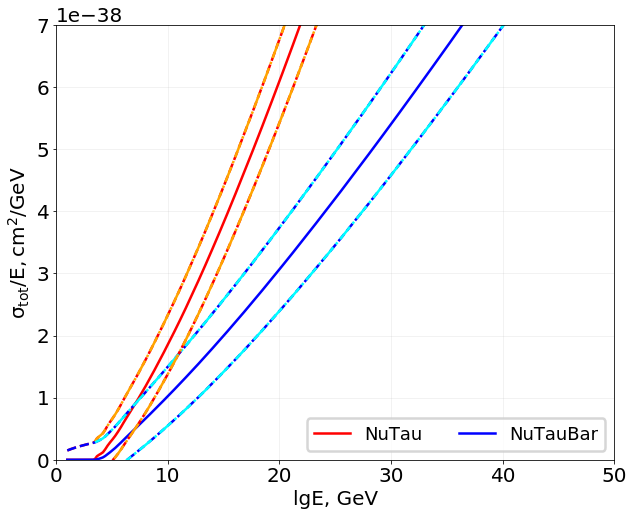

In [51]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
# title = get_title(pdg, hitN, CC)
# ax.set_title('NuTau CC', fontsize=18)
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

ax.set_xlim(0.,50.)
ax.set_ylim(0.,0.7e-37)

ax.plot(E, (xsec_nutau), c='red', linestyle='-', label='NuTau')
ax.plot(E, (xsec_nutaubar), c='blue', linestyle='-', label='NuTauBar')

ax.plot(E, (xsec_nutau+f), c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar+f), c='blue', linestyle='--')

ax.plot(E, (xsec_nutau-f), c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar-f), c='blue', linestyle='--')

ax.plot(E, (xsec_nutau*r_plus), c='orange', linestyle='-.')
ax.plot(E, (xsec_nutaubar*r_plus_bar), c='cyan', linestyle='-.')

ax.plot(E, (xsec_nutau*r_minus), c='orange', linestyle='-.')
ax.plot(E, (xsec_nutaubar*r_minus_bar), c='cyan', linestyle='-.')

plt.legend(ncol=2, fontsize=18)
plt.grid()
# plt.savefig('NuTauCC_GENIE_vs_models.pdf', dpi='figure')
plt.show()

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


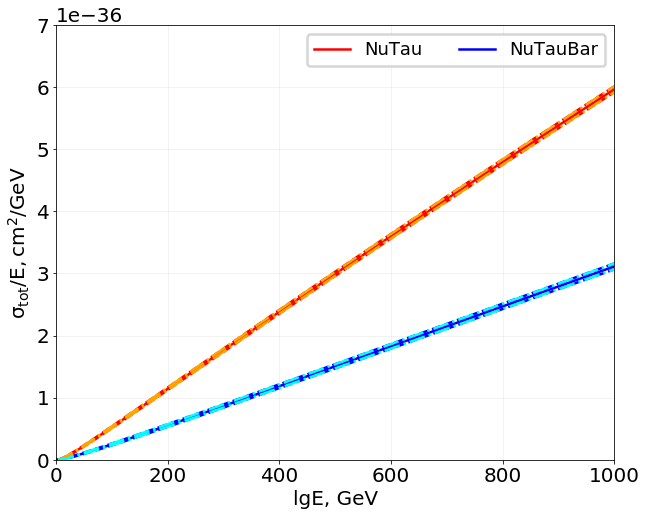

In [46]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
# title = get_title(pdg, hitN, CC)
# ax.set_title('NuTau CC', fontsize=18)
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

ax.set_xlim(0.,1000.)
ax.set_ylim(0.,0.7e-35)

ax.plot(E, (xsec_nutau), c='red', linestyle='-', label='NuTau')
ax.plot(E, (xsec_nutaubar), c='blue', linestyle='-', label='NuTauBar')

ax.plot(E, (xsec_nutau+f), c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar+f), c='blue', linestyle='--')

ax.plot(E, (xsec_nutau-f), c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar-f), c='blue', linestyle='--')

ax.plot(E, (xsec_nutau*r_plus), c='orange', linestyle='-.')
ax.plot(E, (xsec_nutaubar*r_plus_bar), c='cyan', linestyle='-.')

ax.plot(E, (xsec_nutau*r_minus), c='orange', linestyle='-.')
ax.plot(E, (xsec_nutaubar*r_minus_bar), c='cyan', linestyle='-.')

plt.legend(ncol=2, fontsize=18)
plt.grid()
# plt.savefig('NuTauCC_GENIE_vs_models.pdf', dpi='figure')
plt.show()

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


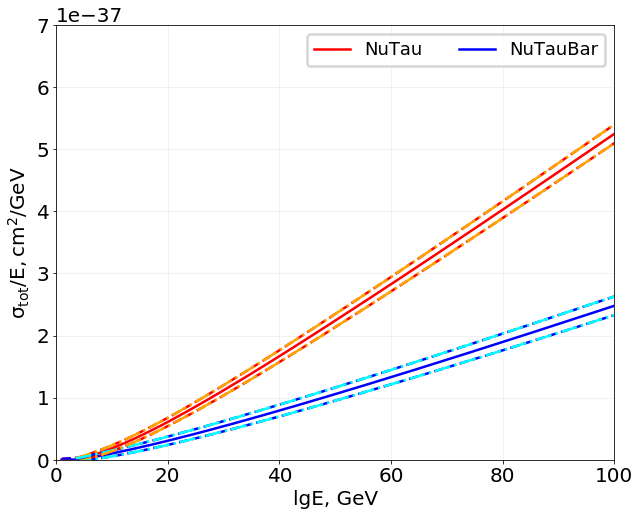

In [47]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
# title = get_title(pdg, hitN, CC)
# ax.set_title('NuTau CC', fontsize=18)
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

ax.set_xlim(0.,100.)
ax.set_ylim(0.,0.7e-36)

ax.plot(E, (xsec_nutau), c='red', linestyle='-', label='NuTau')
ax.plot(E, (xsec_nutaubar), c='blue', linestyle='-', label='NuTauBar')

ax.plot(E, (xsec_nutau+f), c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar+f), c='blue', linestyle='--')

ax.plot(E, (xsec_nutau-f), c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar-f), c='blue', linestyle='--')

ax.plot(E, (xsec_nutau*r_plus), c='orange', linestyle='-.')
ax.plot(E, (xsec_nutaubar*r_plus_bar), c='cyan', linestyle='-.')

ax.plot(E, (xsec_nutau*r_minus), c='orange', linestyle='-.')
ax.plot(E, (xsec_nutaubar*r_minus_bar), c='cyan', linestyle='-.')

plt.legend(ncol=2, fontsize=18)
plt.grid()
# plt.savefig('NuTauCC_GENIE_vs_models.pdf', dpi='figure')
plt.show()

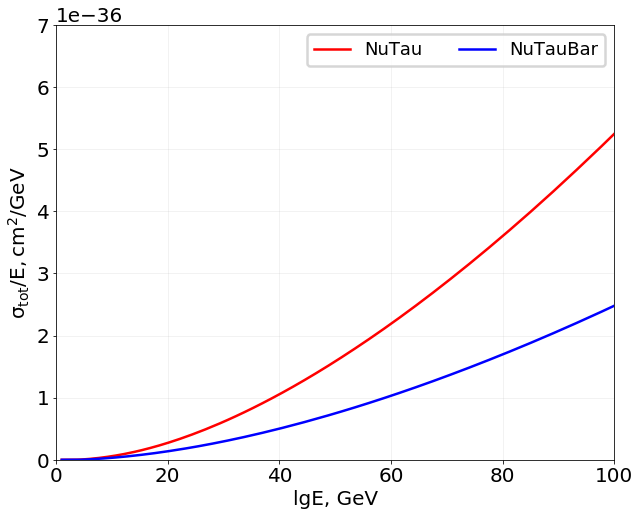

In [52]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
# title = get_title(pdg, hitN, CC)
# ax.set_title('NuTau CC', fontsize=18)
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}*\sqrt(E[GeV]), cm^2}$')

ax.set_xlim(0.,100.)
ax.set_ylim(0.,0.7e-35)

ax.plot(E, (xsec_nutau*np.sqrt(E)), c='red', linestyle='-', label='NuTau')
ax.plot(E, (xsec_nutaubar*np.sqrt(E)), c='blue', linestyle='-', label='NuTauBar')

# ax.plot(E, (xsec_nutau+f), c='red', linestyle='--')
# ax.plot(E, (xsec_nutaubar+f), c='blue', linestyle='--')

# ax.plot(E, (xsec_nutau-f), c='red', linestyle='--')
# ax.plot(E, (xsec_nutaubar-f), c='blue', linestyle='--')

# ax.plot(E, (xsec_nutau*r_plus), c='orange', linestyle='-.')
# ax.plot(E, (xsec_nutaubar*r_plus_bar), c='cyan', linestyle='-.')

# ax.plot(E, (xsec_nutau*r_minus), c='orange', linestyle='-.')
# ax.plot(E, (xsec_nutaubar*r_minus_bar), c='cyan', linestyle='-.')

plt.legend(ncol=2, fontsize=18)
plt.grid()
# plt.savefig('NuTauCC_GENIE_vs_models.pdf', dpi='figure')
plt.show()

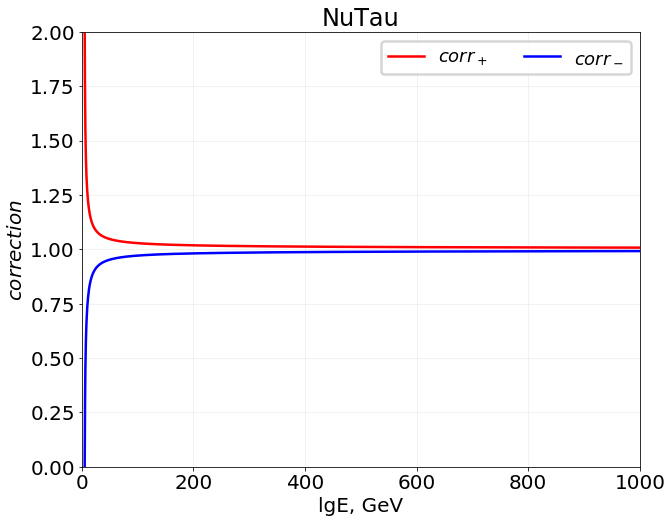

In [62]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
plt.title('NuTau')
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$correction$')

ax.set_xlim(0.,1000)
ax.set_ylim(0.,2.00)

ax.plot(E, r_plus, c='red', linestyle='-', label=r'$corr_+$')
ax.plot(E, r_minus, c='blue', linestyle='-', label=r'$corr_-$')


plt.legend(ncol=2, fontsize=18)
plt.grid()
plt.show()

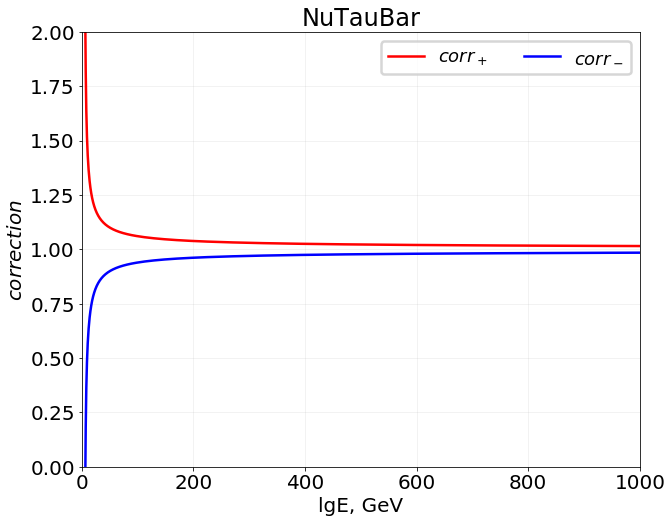

In [63]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
plt.title('NuTauBar')
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$correction$')

ax.set_xlim(0.,1000)
ax.set_ylim(0.,2.00)

ax.plot(E, r_plus_bar, c='red', linestyle='-', label=r'$corr_+$')
ax.plot(E, r_minus_bar, c='blue', linestyle='-', label=r'$corr_-$')


plt.legend(ncol=2, fontsize=18)
plt.grid()
plt.show()

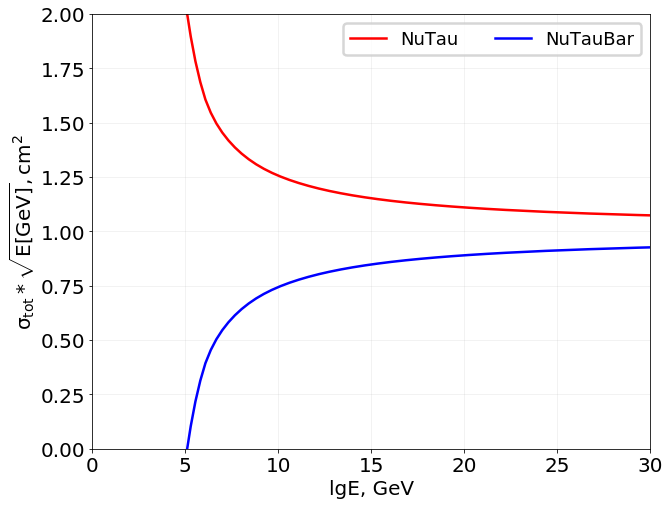

In [59]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}*\sqrt{E[GeV]}, cm^2}$')

ax.set_xlim(0.,30)
ax.set_ylim(0.,2.00)

ax.plot(E, r_plus, c='red', linestyle='-', label='NuTau')
ax.plot(E, r_minus, c='blue', linestyle='-', label='NuTauBar')


plt.legend(ncol=2, fontsize=18)
plt.grid()
plt.show()

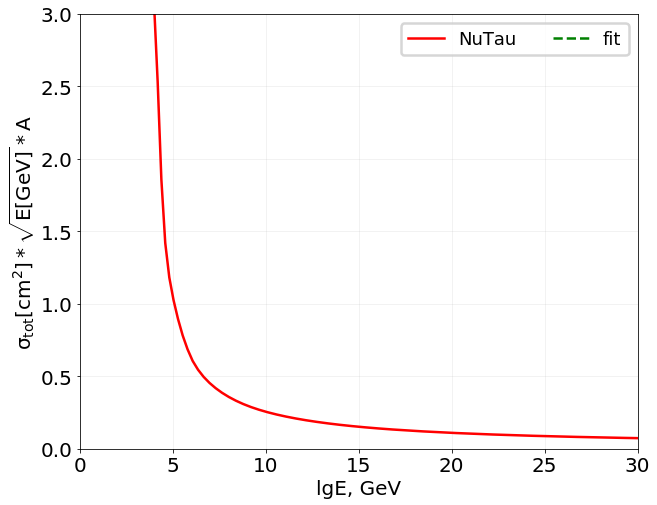

In [77]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}[cm^2]*\sqrt{E[GeV]}*A}$')

ax.set_xlim(0.,30)
ax.set_ylim(0.,3.00)

ax.plot(E, r_plus-1, c='red', linestyle='-', label='NuTau')
# ax.plot(E, r_minus, c='blue', linestyle='-', label='NuTauBar')

coef = np.polyfit(E, r_plus-1, 6)
fit = np.polyval(coef, E)

ax.plot(E, fit, c='g', linestyle='--', label='fit')

plt.legend(ncol=2, fontsize=18)
plt.grid()
plt.show()

In [82]:
from scipy import interpolate

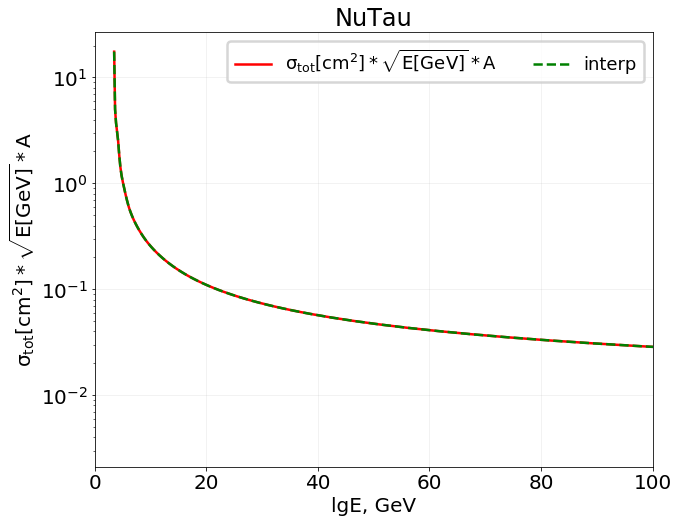

In [91]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
plt.title('NuTau')
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}[cm^2]*\sqrt{E[GeV]}*A}$')

ax.set_xlim(0.,100)
# ax.set_ylim(0.,18.00)
ax.set_yscale('log')

ax.plot(E, r_plus-1, c='red', linestyle='-', label=r'$\mathrm{\sigma_{tot}[cm^2]*\sqrt{E[GeV]}*A}$')

func = interpolate.interp1d(E, r_plus-1)
rnew = func(E)

ax.plot(E, rnew, c='g', linestyle='--', label='interp')

plt.legend(ncol=2, fontsize=18)
plt.grid()
plt.show()

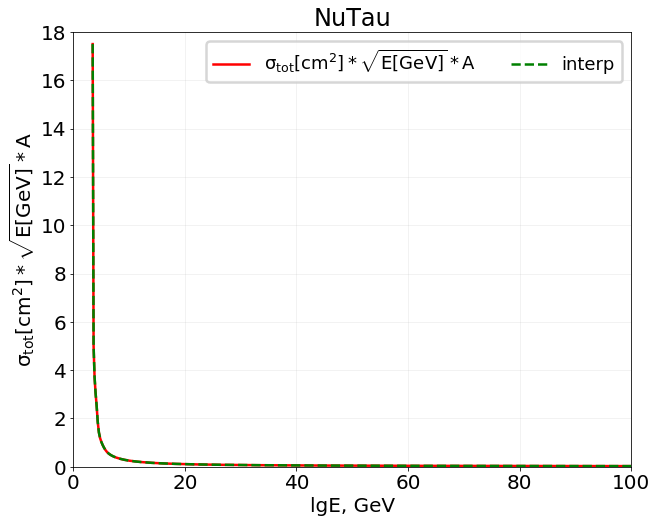

In [89]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
plt.title('NuTau')
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}[cm^2]*\sqrt{E[GeV]}*A}$')

ax.set_xlim(0.,100)
ax.set_ylim(0.,18.00)

ax.plot(E, r_plus-1, c='red', linestyle='-', label=r'$\mathrm{\sigma_{tot}[cm^2]*\sqrt{E[GeV]}*A}$')

func = interpolate.interp1d(E, r_plus-1)
rnew = func(E)

ax.plot(E, rnew, c='g', linestyle='--', label='interp')

plt.legend(ncol=2, fontsize=18)
plt.grid()
plt.show()

In [ ]:
wght_bar = get_weight_nutau_xsec(E, nu='NuTauBar', scale = 0.)
print (wght_bar[(wght_bar==1.)], E[(wght_bar==1.)])

wght = get_weight_nutau_xsec(E, nu='NuTau', scale = 0.)
print (wght[(wght==1.)], E[(wght==1.)])

In [130]:
func_nutau = interpolate.interp1d(E, r_plus-1)
func_nutaubar = interpolate.interp1d(E, r_plus_bar-1)
d_func = {'NuTau':func_nutau, 'NuTauBar':func_nutaubar}

In [125]:
func_nutau = interpolate.interp1d(E[(wght==1.)], r_plus[(wght==1.)]-1)
func_nutaubar = interpolate.interp1d(E[(wght_bar==1.)], r_plus_bar[(wght_bar==1.)]-1)
d_func = {'NuTau':func_nutau, 'NuTauBar':func_nutaubar}

In [131]:
with open('interp_nutau_xsec.pckl', 'wb') as savefile:
    pickle.dump(d_func, savefile)

In [132]:
with open(os.path.join('interp_nutau_xsec.pckl'), 'rb') as fl:
    d_func_load = pickle.load(fl, encoding='latin1')

In [133]:
with open(os.path.join('interp_nutau_xsec.pckl'), 'rb') as fl:
    interp_dict = pickle.load(fl, encoding='latin1')
    
def get_weight_nutau_xsec(E, nu, scale = 0):
    
    # nu can be 'NuTau' or 'NuTauBar'
    # scale should be in range [-1,1] 
    # scale=0 corresponds to nominal value (w=1)
    
    if nu not in ['NuTau', 'NuTauBar']:
        print ("'nu' argument should be equal to 'NuTau' or 'NuTauBar'. It's not. Returning 1.")
        return 1
    
    if scale < -1. or scale > 1.:
        print ("'scale' argument should be in range [-1, 1]. It's not. Returning 2.")
        return 2
    
    f = interp_dict[nu]
    w = 1 + f(E) * scale
    
    return w

In [100]:
d_func_load

{'NuTau': <scipy.interpolate.interpolate.interp1d at 0x2ad86bfb3598>,
 'NuTauBar': <scipy.interpolate.interpolate.interp1d at 0x2ad86bfb37c8>}

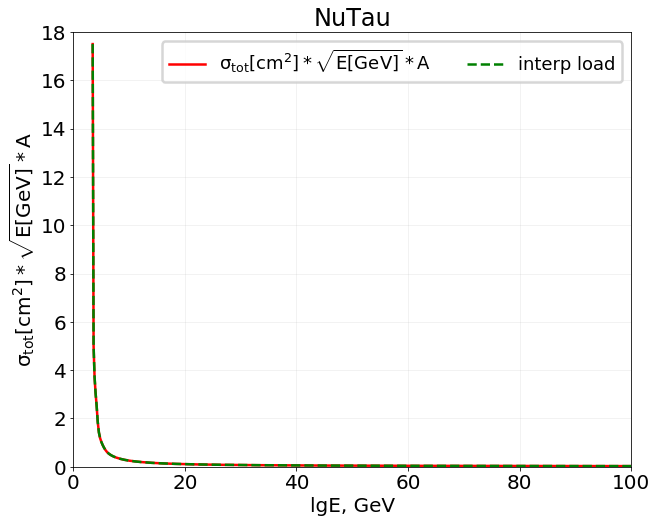

In [101]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
plt.title('NuTau')
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}[cm^2]*\sqrt{E[GeV]}*A}$')

ax.set_xlim(0.,100)
ax.set_ylim(0.,18.00)

ax.plot(E, r_plus-1, c='red', linestyle='-', label=r'$\mathrm{\sigma_{tot}[cm^2]*\sqrt{E[GeV]}*A}$')

rnew = d_func_load['NuTau'](E)

ax.plot(E, rnew, c='g', linestyle='--', label='interp load')

plt.legend(ncol=2, fontsize=18)
plt.grid()
plt.show()

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


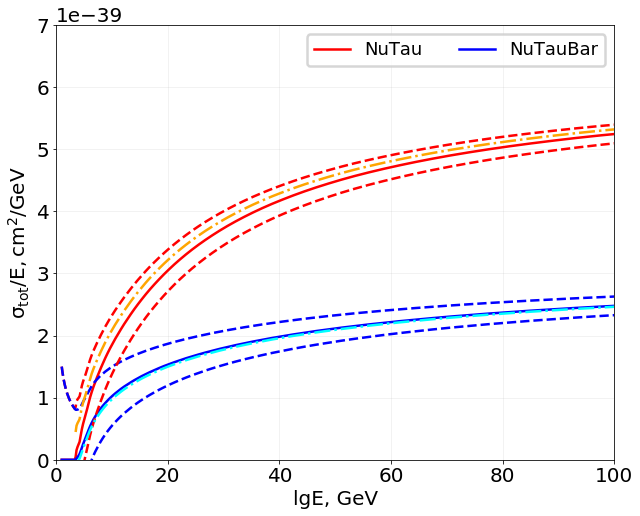

In [118]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
# title = get_title(pdg, hitN, CC)
# ax.set_title('NuTau CC', fontsize=18)
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

ax.set_xlim(0.,100.)
ax.set_ylim(0.,0.7e-38)

ax.plot(E, (xsec_nutau)/E, c='red', linestyle='-', label='NuTau')
ax.plot(E, (xsec_nutaubar)/E, c='blue', linestyle='-', label='NuTauBar')

ax.plot(E, (xsec_nutau+f)/E, c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar+f)/E, c='blue', linestyle='--')

ax.plot(E, (xsec_nutau-f)/E, c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar-f)/E, c='blue', linestyle='--')

rnew = d_func_load['NuTau'](E)
rnew_bar = d_func_load['NuTauBar'](E)

wght = get_weight_nutau_xsec(E, nu='NuTau', scale = 0.5)
wght_bar = get_weight_nutau_xsec(E, nu='NuTauBar', scale = -0.1)

ax.plot(E, (xsec_nutau*wght)/E, c='orange', linestyle='-.')
ax.plot(E, (xsec_nutaubar*wght_bar)/E, c='cyan', linestyle='-.')

# ax.plot(E, (xsec_nutau*(1.-rnew))/E, c='orange', linestyle='-.')
# ax.plot(E, (xsec_nutaubar*(1.-rnew_bar))/E, c='cyan', linestyle='-.')

plt.legend(ncol=2, fontsize=18)
plt.grid()
# plt.savefig('NuTauCC_GENIE_vs_models.pdf', dpi='figure')
plt.show()

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


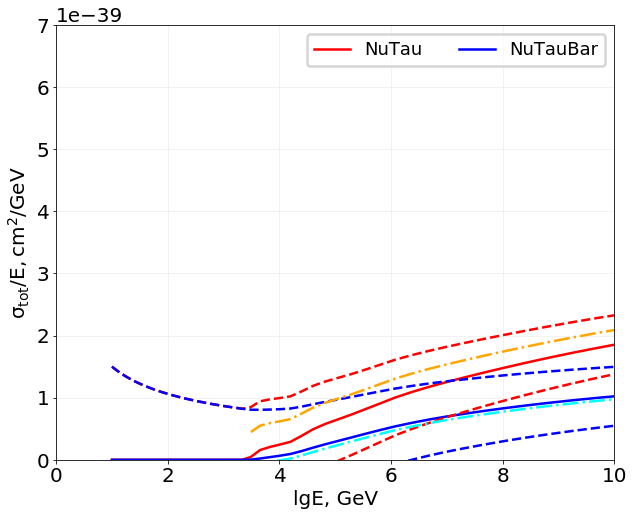

In [134]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
# title = get_title(pdg, hitN, CC)
# ax.set_title('NuTau CC', fontsize=18)
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

ax.set_xlim(0.,10.)
ax.set_ylim(0.,0.7e-38)

ax.plot(E, (xsec_nutau)/E, c='red', linestyle='-', label='NuTau')
ax.plot(E, (xsec_nutaubar)/E, c='blue', linestyle='-', label='NuTauBar')

ax.plot(E, (xsec_nutau+f)/E, c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar+f)/E, c='blue', linestyle='--')

ax.plot(E, (xsec_nutau-f)/E, c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar-f)/E, c='blue', linestyle='--')

rnew = d_func_load['NuTau'](E)
rnew_bar = d_func_load['NuTauBar'](E)

wght = get_weight_nutau_xsec(E, nu='NuTau', scale = 0.5)
wght_bar = get_weight_nutau_xsec(E, nu='NuTauBar', scale = -0.1)

ax.plot(E, (xsec_nutau*wght)/E, c='orange', linestyle='-.')
ax.plot(E, (xsec_nutaubar*wght_bar)/E, c='cyan', linestyle='-.')

# ax.plot(E, (xsec_nutau*(1.-rnew))/E, c='orange', linestyle='-.')
# ax.plot(E, (xsec_nutaubar*(1.-rnew_bar))/E, c='cyan', linestyle='-.')

plt.legend(ncol=2, fontsize=18)
plt.grid()
# plt.savefig('NuTauCC_GENIE_vs_models.pdf', dpi='figure')
plt.show()

In [135]:
wght_bar = get_weight_nutau_xsec(E, nu='NuTauBar', scale = 0.)
print (wght_bar, E)

wght = get_weight_nutau_xsec(E, nu='NuTau', scale = 0.)
print (wght, E)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.] [1.00000000e+00 1.04737090e+00 1.09698580e+00 1.14895100e+00
 1.20337784e+00 1.26038293e+00 1.32008840e+00 1.38262217e+00
 1.44811823e+00 1.51671689e+00 1.58856513e+00 1.66381689e+00
 1.7

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply


In [137]:
np.isnan(wght[0])

True

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


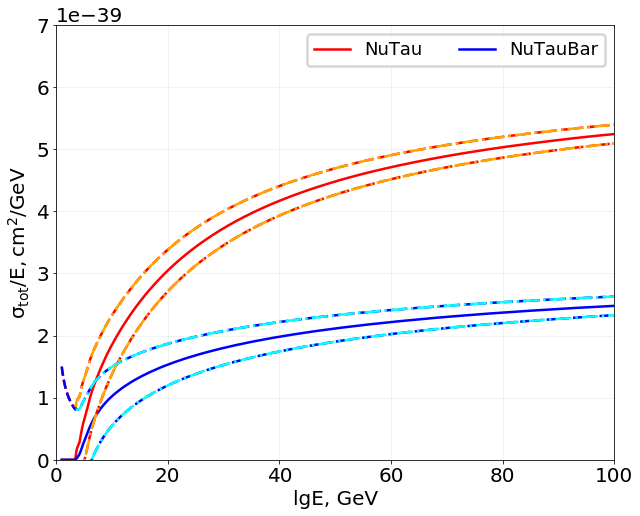

In [37]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
# title = get_title(pdg, hitN, CC)
# ax.set_title('NuTau CC', fontsize=18)
ax.set_xlabel('lgE, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

ax.set_xlim(0.,100.)
ax.set_ylim(0.,0.7e-38)

ax.plot(E, (xsec_nutau)/E, c='red', linestyle='-', label='NuTau')
ax.plot(E, (xsec_nutaubar)/E, c='blue', linestyle='-', label='NuTauBar')

ax.plot(E, (xsec_nutau+f)/E, c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar+f)/E, c='blue', linestyle='--')

ax.plot(E, (xsec_nutau-f)/E, c='red', linestyle='--')
ax.plot(E, (xsec_nutaubar-f)/E, c='blue', linestyle='--')

ax.plot(E, (xsec_nutau*r_plus)/E, c='orange', linestyle='-.')
ax.plot(E, (xsec_nutaubar*r_plus_bar)/E, c='cyan', linestyle='-.')

ax.plot(E, (xsec_nutau*r_minus)/E, c='orange', linestyle='-.')
ax.plot(E, (xsec_nutaubar*r_minus_bar)/E, c='cyan', linestyle='-.')

plt.legend(ncol=2, fontsize=18)
plt.grid()
# plt.savefig('NuTauCC_GENIE_vs_models.pdf', dpi='figure')
plt.show()

In [104]:
rnew_bar

NameError: name 'rnew_bar' is not defined

1000010010 1000000010


/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


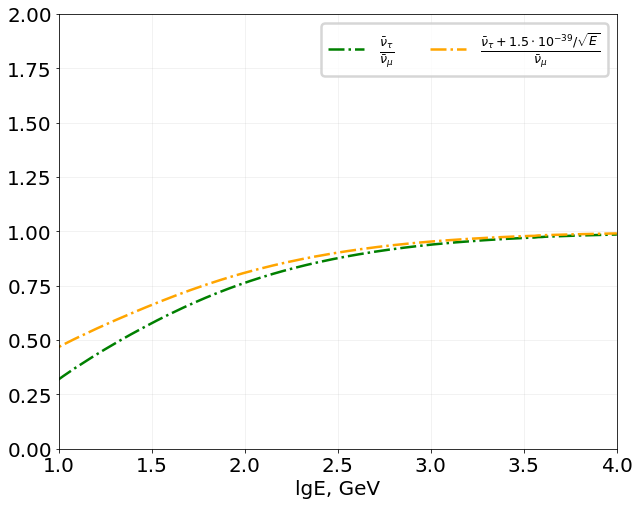

In [11]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
# title = get_title(pdg, hitN, CC)
# ax.set_title('NuTau CC', fontsize=18)
ax.set_xlabel('lgE, GeV')
# ax.set_ylabel(r'$\frac{\nu_{\tau}+1.5\cdot 10^{-39}/\sqrt{E}}{\nu_{\mu}}$')

ax.set_xlim(1.,4.)
ax.set_ylim(0.,2.)

# for k in nutau_xsec.keys():
#     ax.plot(nutau_xsec[k]['E'],np.array(nutau_xsec[k]['xsec_per_E'])*1.0e-38, c=crls[k], linestyle=ls[k], label=k)

plot_ind_iso(ax, 'GENIE_2_12_8_water_splines_highen_fits.pckl', 
             pdg=16, hitN=2212, CC=1, genie_det='', linestyle='-.')

plt.legend(ncol=2, fontsize=18)
plt.grid()
# savename = title.replace(' ','_').replace(':','_')
plt.savefig('NuTauCC_GENIE_vs_models.pdf', dpi='figure')
plt.show()

In [194]:
sk_xsec.keys()

dict_keys(['donut_nu', 'SK_point', 'donut_nubar', 'neut_nubar', 'neut_nu'])

1000010010 1000000010


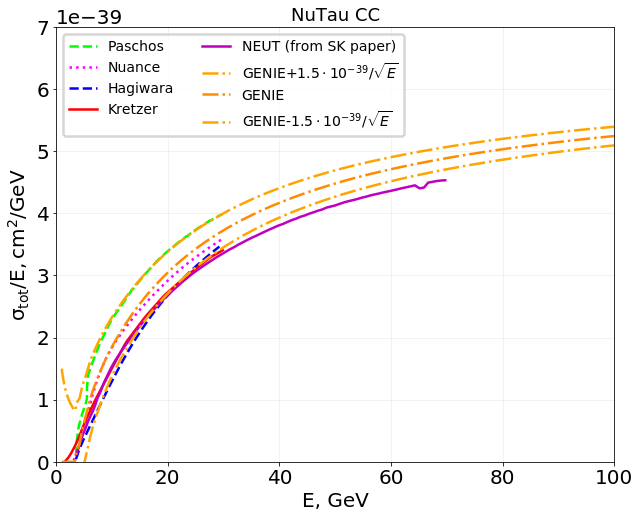

In [14]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
# title = get_title(pdg, hitN, CC)
ax.set_title('NuTau CC', fontsize=18)
ax.set_xlabel('E, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

ax.set_xlim(0.,100.)
ax.set_ylim(0.,0.7e-38)

for k in nutau_xsec.keys():
    ax.plot(nutau_xsec[k]['E'],np.array(nutau_xsec[k]['xsec_per_E'])*1.0e-38, c=crls[k], linestyle=ls[k], label=k)
    
ax.plot(sk_xsec['neut_nu']['E'],
        np.array(sk_xsec['neut_nu']['xsec'])/np.array(sk_xsec['neut_nu']['E'])*1.0e-38, 
        c='m', linestyle='-', label='NEUT (from SK paper)')

plot_ind_iso(ax, 'GENIE_2_12_8_water_splines_highen_fits.pckl', 
             pdg=16, hitN=2212, CC=1, genie_det='', linestyle='-.')

plt.legend(ncol=2, fontsize=14)
plt.grid()
# savename = title.replace(' ','_').replace(':','_')
plt.savefig('NuTauCC_GENIE_vs_models.pdf', dpi='figure')
plt.show()

1000010010 1000000010


/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in multiply
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply


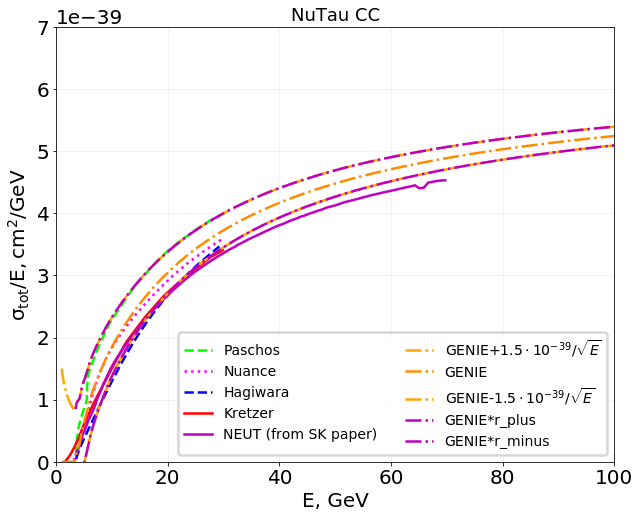

In [19]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
# title = get_title(pdg, hitN, CC)
ax.set_title('NuTau CC', fontsize=18)
ax.set_xlabel('E, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

ax.set_xlim(0.,100.)
ax.set_ylim(0.,0.7e-38)

for k in nutau_xsec.keys():
    ax.plot(nutau_xsec[k]['E'],np.array(nutau_xsec[k]['xsec_per_E'])*1.0e-38, c=crls[k], linestyle=ls[k], label=k)
    
ax.plot(sk_xsec['neut_nu']['E'],
        np.array(sk_xsec['neut_nu']['xsec'])/np.array(sk_xsec['neut_nu']['E'])*1.0e-38, 
        c='m', linestyle='-', label='NEUT (from SK paper)')

plot_ind_iso_mult(ax, 'GENIE_2_12_8_water_splines_highen_fits.pckl', 
             pdg=16, hitN=2212, CC=1, genie_det='', linestyle='-.')

plt.legend(ncol=2, fontsize=14)
plt.grid()
# savename = title.replace(' ','_').replace(':','_')
plt.savefig('NuTauCC_GENIE_vs_models.pdf', dpi='figure')
plt.show()

1000010010 1000000010


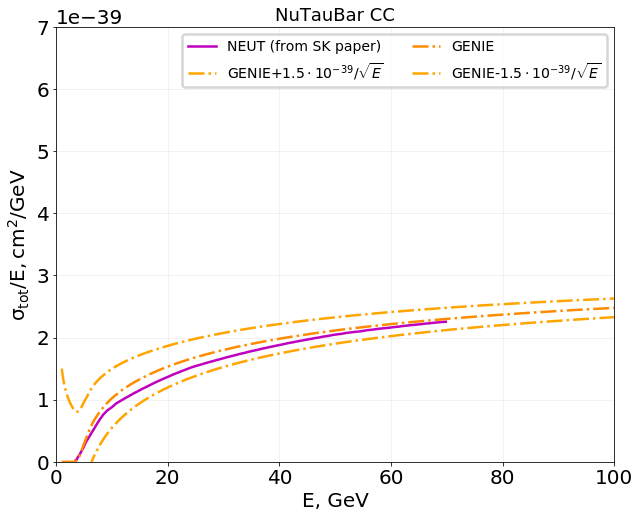

In [199]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
# title = get_title(pdg, hitN, CC)
ax.set_title('NuTauBar CC', fontsize=18)
ax.set_xlabel('E, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

ax.set_xlim(0.,100.)
ax.set_ylim(0.,0.7e-38)

# for k in nutau_xsec.keys():
#     ax.plot(nutau_xsec[k]['E'],np.array(nutau_xsec[k]['xsec_per_E'])*1.0e-38, c=crls[k], linestyle=ls[k], label=k)
    
ax.plot(sk_xsec['neut_nubar']['E'],
        np.array(sk_xsec['neut_nubar']['xsec'])/np.array(sk_xsec['neut_nubar']['E'])*1.0e-38, 
        c='m', linestyle='-', label='NEUT (from SK paper)')

plot_ind_iso(ax, 'GENIE_2_12_8_water_splines_highen_fits.pckl', 
             pdg=-16, hitN=2212, CC=1, genie_det='', linestyle='-.')

plt.legend(ncol=2, fontsize=14)
plt.grid()
# savename = title.replace(' ','_').replace(':','_')
plt.savefig('NuTauCC_GENIE_vs_models.pdf', dpi='figure')
plt.show()

1000010010 1000000010


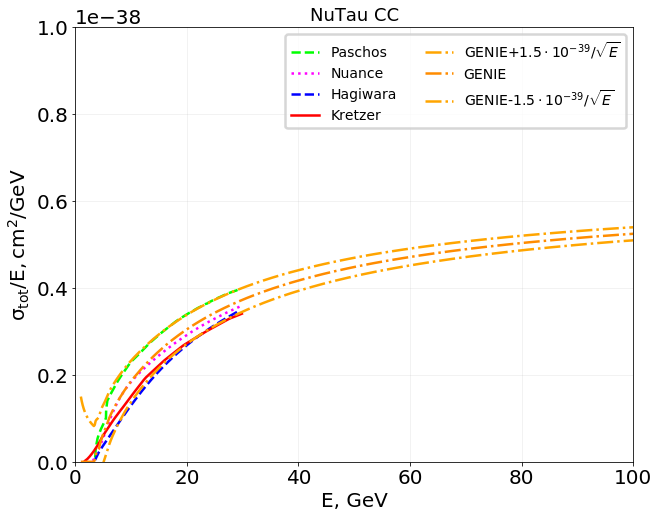

In [191]:
fig = plt.figure(figsize=(10,8), facecolor='w')
ax = plt.gca()
    
# title = get_title(pdg, hitN, CC)
ax.set_title('NuTau CC', fontsize=18)
ax.set_xlabel('E, GeV')
ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

ax.set_xlim(0.,100.)
ax.set_ylim(0.,1.0e-38)

for k in nutau_xsec.keys():
    ax.plot(nutau_xsec[k]['E'],np.array(nutau_xsec[k]['xsec_per_E'])*1.0e-38, c=crls[k], linestyle=ls[k], label=k)

plot_ind_iso(ax, 'GENIE_2_12_8_water_splines_highen_fits.pckl', 
             pdg=16, hitN=2212, CC=1, genie_det='', linestyle='-.')

plt.legend(ncol=2, fontsize=14)
plt.grid()
# savename = title.replace(' ','_').replace(':','_')
plt.savefig('NuTauCC_GENIE_vs_models.pdf', dpi='figure')
plt.show()

In [10]:
def tgt_by_Npdg(hitN):
    if hitN == 2212:
        return 1000010010
    elif hitN == 2112:
        return 1000000010
    else:
        return 1
    
def get_title(pdg, hitN, CC):
    nuname = {12:'NuE',14:'NuMu',16:'NuTau',
              -12:'NuEBar',-14:'NuMuBar',-16:'NuTauBar'}
    CC_name = {1:'CC',0:'NC'}
    hitN_name = {2212:'protons',2112:'neutrons'}
    
    return nuname[pdg]+' '+CC_name[CC]+': '+hitN_name[hitN]

In [59]:
def plot_ind_v2(ax, filename, pdg=14, hitN=2212, CC=1, linestyle='-'):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    tgt = tgt_by_Npdg(hitN)
        
    ind_base = (genie['tgt']==tgt)*(genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)

    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_base], axis=0)*conv,
            c='red', linestyle=linestyle, label='total: GENIE')
    
    ind_sea = ind_base*(genie['sea']==1)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_sea], axis=0)*conv,
            c='orange', linestyle=linestyle, label='sea: GENIE')
    
    ind_val = ind_base*(genie['sea']==0)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_val], axis=0)*conv,
            c='green', linestyle=linestyle, label='valence: GENIE')
        
    return 0

def plot_ind_hedis(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', linestyle='--'):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    tgt = tgt_by_Npdg(hitN)

    ind_base = (genie['tgt']==tgt)*(genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)
    
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_base], axis=0)*conv,
            c='red', linestyle=linestyle, label='total: '+hedis_model+'(HEDIS)')
    
    ind_sea = ind_base*(genie['sea']==1)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_sea], axis=0)*conv,
            c='orange', linestyle=linestyle, label='sea: '+hedis_model+'(HEDIS)')
    
    ind_val = ind_base*(genie['sea']==0)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_val], axis=0)*conv,
            c='green', linestyle=linestyle, label='valence: '+hedis_model+'(HEDIS)')
    
    return 0

def plot_ind(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det='', linestyle='-'):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    if 'int_hedis' in genie.keys():
        gen = hedis_model+'(HEDIS)'
    else:
        gen = 'GENIE'+genie_det
        
    tgt = tgt_by_Npdg(hitN)

    ind_base = (genie['tgt']==tgt)*(genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)
    
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_base], axis=0)*conv,
            c='red', linestyle=linestyle, label='total: '+gen)
    
    ind_sea = ind_base*(genie['sea']==1)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_sea], axis=0)*conv,
            c='orange', linestyle=linestyle, label='sea: '+gen)
    
    ind_val = ind_base*(genie['sea']==0)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_val], axis=0)*conv,
            c='green', linestyle=linestyle, label='valence: '+gen)
    
    return 0

def plot_ind_iso(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det='', linestyle='-'):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    if 'int_hedis' in genie.keys():
        gen = hedis_model+'(HEDIS)'
    else:
        gen = 'GENIE'+genie_det
        
    tgt_p = tgt_by_Npdg(2212)
    tgt_n = tgt_by_Npdg(2112)

    ind_base = (genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)*((genie['tgt']==tgt_p)^(genie['tgt']==tgt_n))
    
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_base], axis=0)*conv/2.,
            c='red', linestyle=linestyle, label='total: '+gen)
    
    ind_sea = ind_base*(genie['sea']==1)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_sea], axis=0)*conv/2.,
            c='orange', linestyle=linestyle, label='sea: '+gen)
    
    ind_val = ind_base*(genie['sea']==0)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_val], axis=0)*conv/2.,
            c='green', linestyle=linestyle, label='valence: '+gen)
    
    return 0

def plot_ind_q_contr(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det='', linestyle='-'):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    if 'int_hedis' in genie.keys():
        gen = hedis_model+'(HEDIS)'
    else:
        gen = 'GENIE'+genie_det
        
    tgt = tgt_by_Npdg(hitN)

    ind_base = (genie['tgt']==tgt)*(genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)
    
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_base], axis=0)*conv,
            c='red', linestyle=linestyle, label='total: '+gen)
    
    ind_sea = ind_base*(genie['sea']==1)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_sea], axis=0)*conv,
            c='orange', linestyle=linestyle, label='sea: '+gen)
    
    ind_val = ind_base*(genie['sea']==0)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_val], axis=0)*conv,
            c='green', linestyle=linestyle, label='valence: '+gen)
    
    return 0


def plot_def_csms(ax, xsec=xsec_csms, nu=14, hitN=2212, curr=1, linestyle='-'):
    
    nu_sign = int(nu/np.abs(nu))
    
    ind = (xsec['nu']==nu_sign)*\
    (xsec['tgt']==int(hitN))*(xsec['CC']==int(curr))
    
#     print ('nu', nu_sign, 'tgt', int(hitN), 'CC', int(curr), 'ind_base', ind)
#     print (xsec['lgE'][ind][0][10:15], xsec['xsec_per_E'][ind][0][10:15])
    
    ax.plot(xsec['lgE'][ind][0], xsec['xsec_per_E'][ind][0],
         c='k', linestyle=linestyle, label='CSMS(paper)')
    
    return 0

def plot_ind_ratio_sea_val(ax, filename, pdg=14, hitN=2212, CC=1, 
                           hedis_model='CSMS', genie_det='', linestyle='-'):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    if 'int_hedis' in genie.keys():
        gen = hedis_model+'(HEDIS)'
    else:
        gen = 'GENIE'+genie_det
        
    tgt = tgt_by_Npdg(hitN)

    ind_base = (genie['tgt']==tgt)*(genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)
    
    ind_sea = ind_base*(genie['sea']==1)
    ind_val = ind_base*(genie['sea']==0)
    xsec_val = np.sum(genie['xsec_fits'][ind_val], axis=0)
    xsec_sea = np.sum(genie['xsec_fits'][ind_sea], axis=0)
    ax.plot(np.log10(genie['E_fit']), xsec_sea/xsec_val,
            c='blue', linestyle=linestyle, label='sea: '+gen)
    
    return 0

def plot_both(v2_fname, hedis_fname, pdg=14, hitN=2212, CC=1, hedis_model='CSMS'):
    fig = plt.figure(figsize=(10,8))
    ax = plt.gca()
    
    title = get_title(pdg, hitN, CC)
    ax.set_title('GENIE '+title, fontsize=18)
    ax.set_xlabel('log10(E/GeV)')
    ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

    ax.set_xlim(1.,4.)
    ax.set_ylim(0.,1.0e-38)
    
    plot_ind_hedis(ax, hedis_fname, pdg=pdg, hitN=hitN, CC=CC, hedis_model=hedis_model)
    plot_ind_v2(ax, v2_fname, pdg=pdg, hitN=hitN, CC=CC)
    
    plt.legend(ncol=2, fontsize=14)
    plt.grid()
    savename = title.replace(' ','_').replace(':','_')
    plt.savefig('GENIEv2_vs_HEDIS_'+savename+'.pdf', dpi='figure')
    plt.show()

    return 0

def plot_unit_no_ratios(fnames, nu=14, hedis_model=['CSMS','CSMS'], genie_det=['',''], 
                        linestyles=['-','--','-.',':']):
    f, axs = plt.subplots(4,2,figsize=(16,24))
    
    pdg = np.abs(nu)*np.array([1.,-1,1.,-1.])
    CC = np.array([1.,1.,0.,0.])
    hitN = np.array([2212,2112])
    
    for i in range(axs.shape[0]):
        for j in range(axs.shape[1]):
            ax = axs[i,j]
            plt.sca(ax)
            plt.grid()
            title = get_title(pdg[i], hitN[j], CC[i])
            ax.set_title('GENIE '+title, fontsize=18)
            ax.set_xlabel('log10(E/GeV)')
            ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

            ax.set_xlim(1.,4.)
            ax.set_ylim(0.,1.0e-38)
    
                
            for k in range(len(fnames)):
                plot_ind(ax, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
                         hedis_model=hedis_model[k], genie_det=genie_det[k], linestyle=linestyles[k])
#             plot_ind(ax, v2_fname, pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
#                      hedis_model=hedis_model[1], genie_det=genie_det[1], linestyle='-') 

    
    plt.sca(axs[0,0])
    
    plt.legend(ncol=2, fontsize=14)
    plt.tight_layout()    
    
    savename = 'nu'+str(nu)
    for k in range(len(fnames)):
        savename = savename+'_'+fnames[k][:fnames[k].find('.pckl')]
    savename = savename.replace('water_splines_','')+'.pdf'
    plt.savefig(savename, dpi='figure')
    plt.show()

    return 0


def plot_unit(fnames, nu=14, hedis_model=['CSMS','CSMS'], genie_det=['',''], linestyles=['-','--','-.',':'],
             plot_csms=True, plot_iso=False):
    f, axs = plt.subplots(figsize=(16,50), facecolor='w')
    
    pdg = np.abs(nu)*np.array([1.,-1,1.,-1.])
    CC = np.array([1.,1.,0.,0.])
    hitN = np.array([2212,2112])
    
    for i in range(4):
        for j in range(2):
            ax = plt.subplot2grid((24, 2), (4*i, j), rowspan=2) 
            plt.sca(ax)
            plt.grid()
            title = get_title(pdg[i], hitN[j], CC[i])
            ax.set_title('GENIE '+title, fontsize=18)
            plt.setp(ax.get_xticklabels(), visible=False)
            ax.set_ylabel(r'$\mathrm{\sigma_{tot}/E, cm^2/GeV}$')

            ax.set_xlim(1.,4.)
            ax.set_ylim(0.,1.0e-38)
                
            for k in range(len(fnames)):
                if not plot_iso:
                    plot_ind(ax, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
                             hedis_model=hedis_model[k], genie_det=genie_det[k], linestyle=linestyles[k])
                else:
                    plot_ind_iso(ax, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
                             hedis_model=hedis_model[k], genie_det=genie_det[k], linestyle=linestyles[k])
                
            if plot_csms:
#                 print ('DO: pdg=', pdg[i], 'hitN=', hitN[j],' CC=', CC[i], 'i=',i,'j=',j)
                if not plot_iso:
                    plot_def_csms(ax, nu=pdg[i], hitN=hitN[j], curr=CC[i], linestyle='-')
                else:
                    plot_def_csms(ax, nu=pdg[i], hitN=0, curr=CC[i], linestyle=':')

            if i==0 and j==0:
                plt.legend(ncol=2, fontsize=8)
                
            ax1 = plt.subplot2grid((24, 2), (4*i+2, j), rowspan=1, sharex=ax)
            plt.sca(ax1)
            plt.grid()
            ax1.set_xlabel('log10(E/GeV)')
            ax1.set_ylabel('sea/val')
            ax1.set_ylim(0.,3.)
            ax1.axhline(1.,c='grey')
            
            for k in range(len(fnames)):
                plot_ind_ratio_sea_val(ax1, fnames[k], pdg=pdg[i], hitN=hitN[j], CC=CC[i], 
                                       hedis_model=hedis_model[k], genie_det=genie_det[k], 
                                       linestyle=linestyles[k])
    
    savename = 'nu'+str(nu)
    for k in range(len(fnames)):
        savename = savename+'_'+fnames[k][:fnames[k].find('.pckl')]
    savename = savename.replace('water_splines_','')+'.pdf'
    plt.savefig(savename, dpi='figure')
    plt.show()

    return 0

[2.  2.1 2.2 2.3 2.4] [4.33674000e-39 4.37454828e-39 4.40429048e-39 4.42635534e-39
 4.44144284e-39]
[2.  2.1 2.2 2.3 2.4] [8.72901000e-39 8.72418643e-39 8.70601253e-39 8.67585173e-39
 8.63442699e-39]
[2.  2.1 2.2 2.3 2.4] [4.18034000e-39 4.23362651e-39 4.27616828e-39 4.30912263e-39
 4.33419277e-39]
[2.  2.1 2.2 2.3 2.4] [2.45950000e-39 2.51936292e-39 2.57226797e-39 2.61881857e-39
 2.65944348e-39]
[2.  2.1 2.2 2.3 2.4] [1.91968000e-39 1.92597590e-39 1.92917101e-39 1.92980641e-39
 1.92790961e-39]
[2.  2.1 2.2 2.3 2.4] [2.14605000e-39 2.14996057e-39 2.15073799e-39 2.14854456e-39
 2.14377925e-39]
[2.  2.1 2.2 2.3 2.4] [1.15553000e-39 1.17126081e-39 1.18419967e-39 1.19471008e-39
 1.20325504e-39]
[2.  2.1 2.2 2.3 2.4] [1.15995000e-39 1.17624919e-39 1.18965114e-39 1.20069927e-39
 1.20938191e-39]


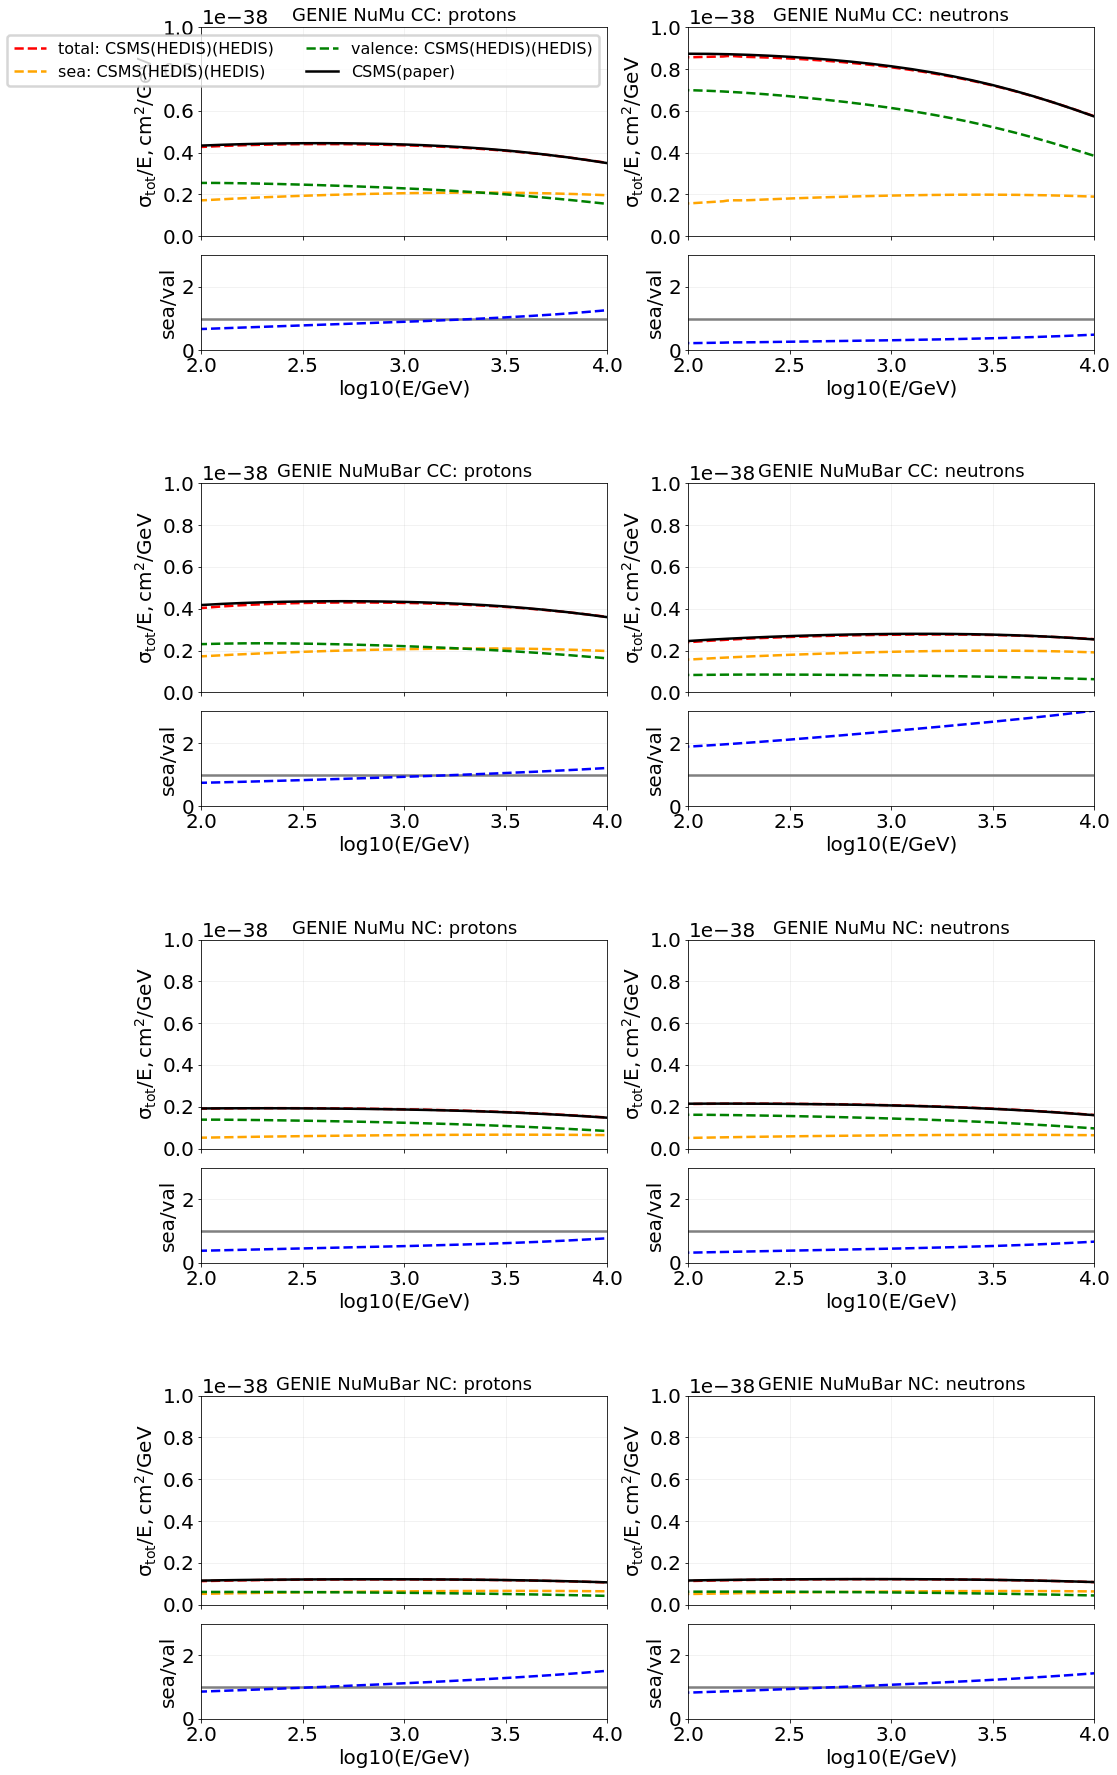

0

In [45]:
def_csms_hedis='GHE19_00b_00_000_fits.pckl'

files=[def_csms_hedis]
hedis_models=['CSMS(HEDIS)']
genie_dets=['']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets, linestyles=['--'])

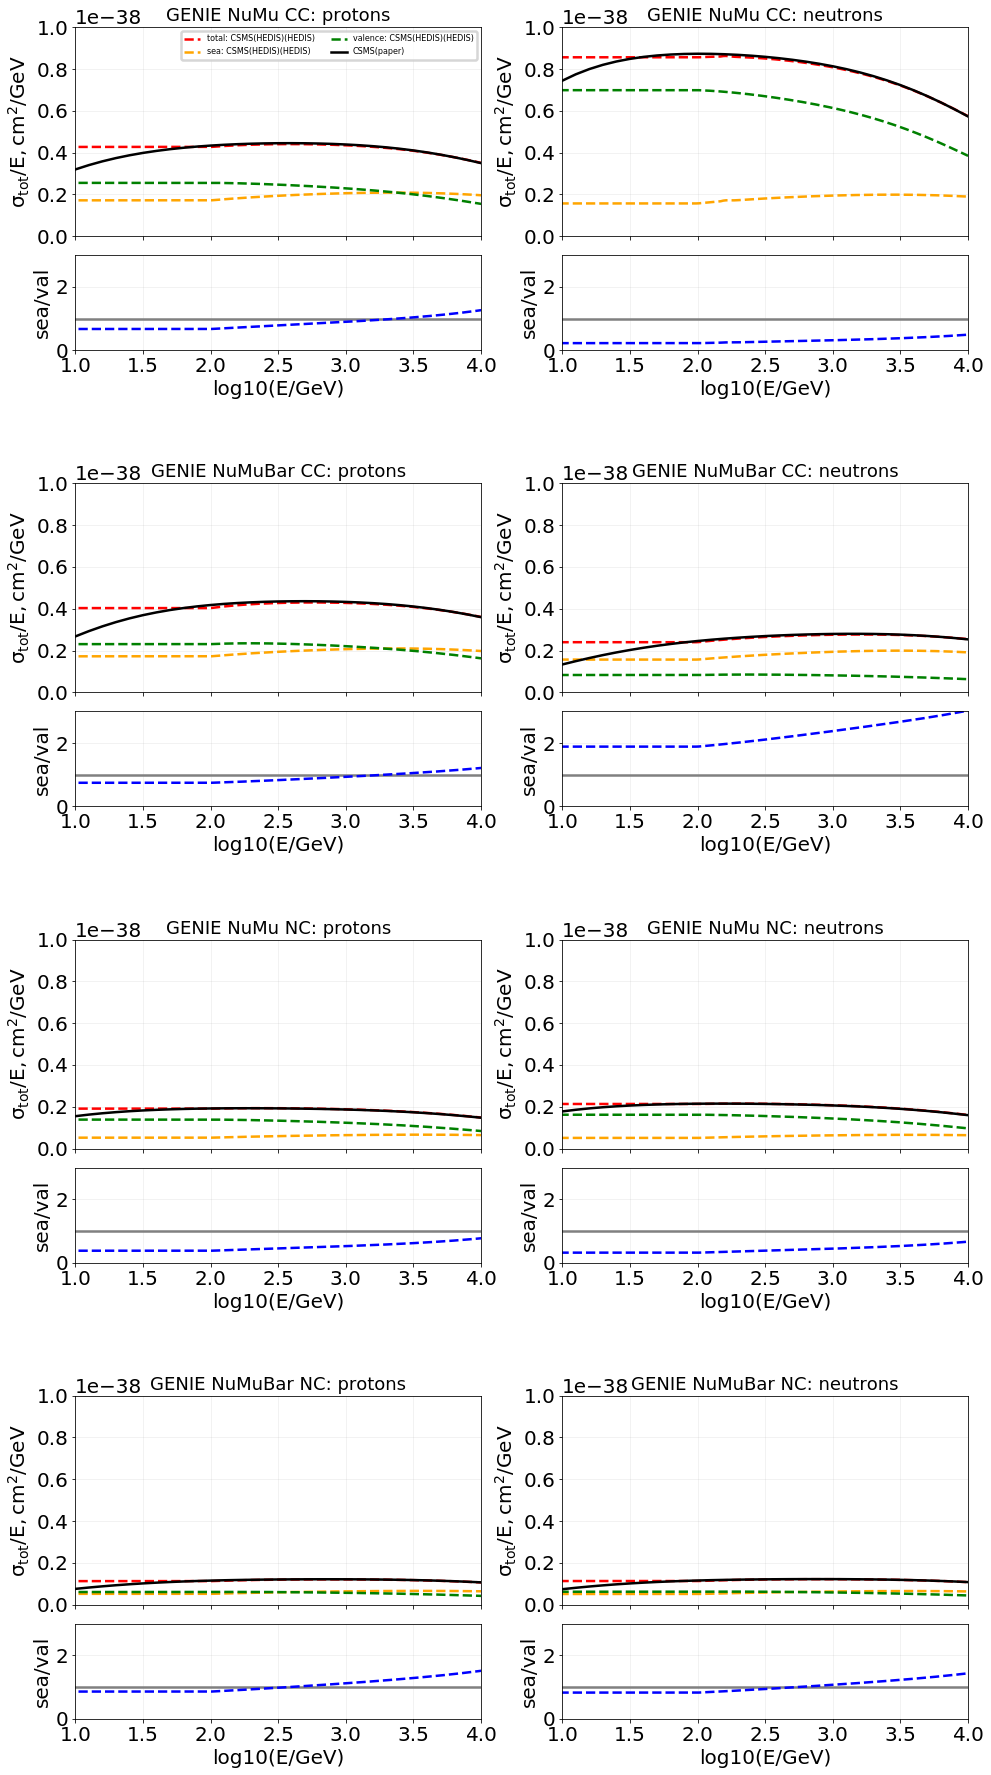

0

In [49]:
def_csms_hedis='GHE19_00b_00_000_fits.pckl'

files=[def_csms_hedis]
hedis_models=['CSMS(HEDIS)']
genie_dets=['']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets, linestyles=['--'])

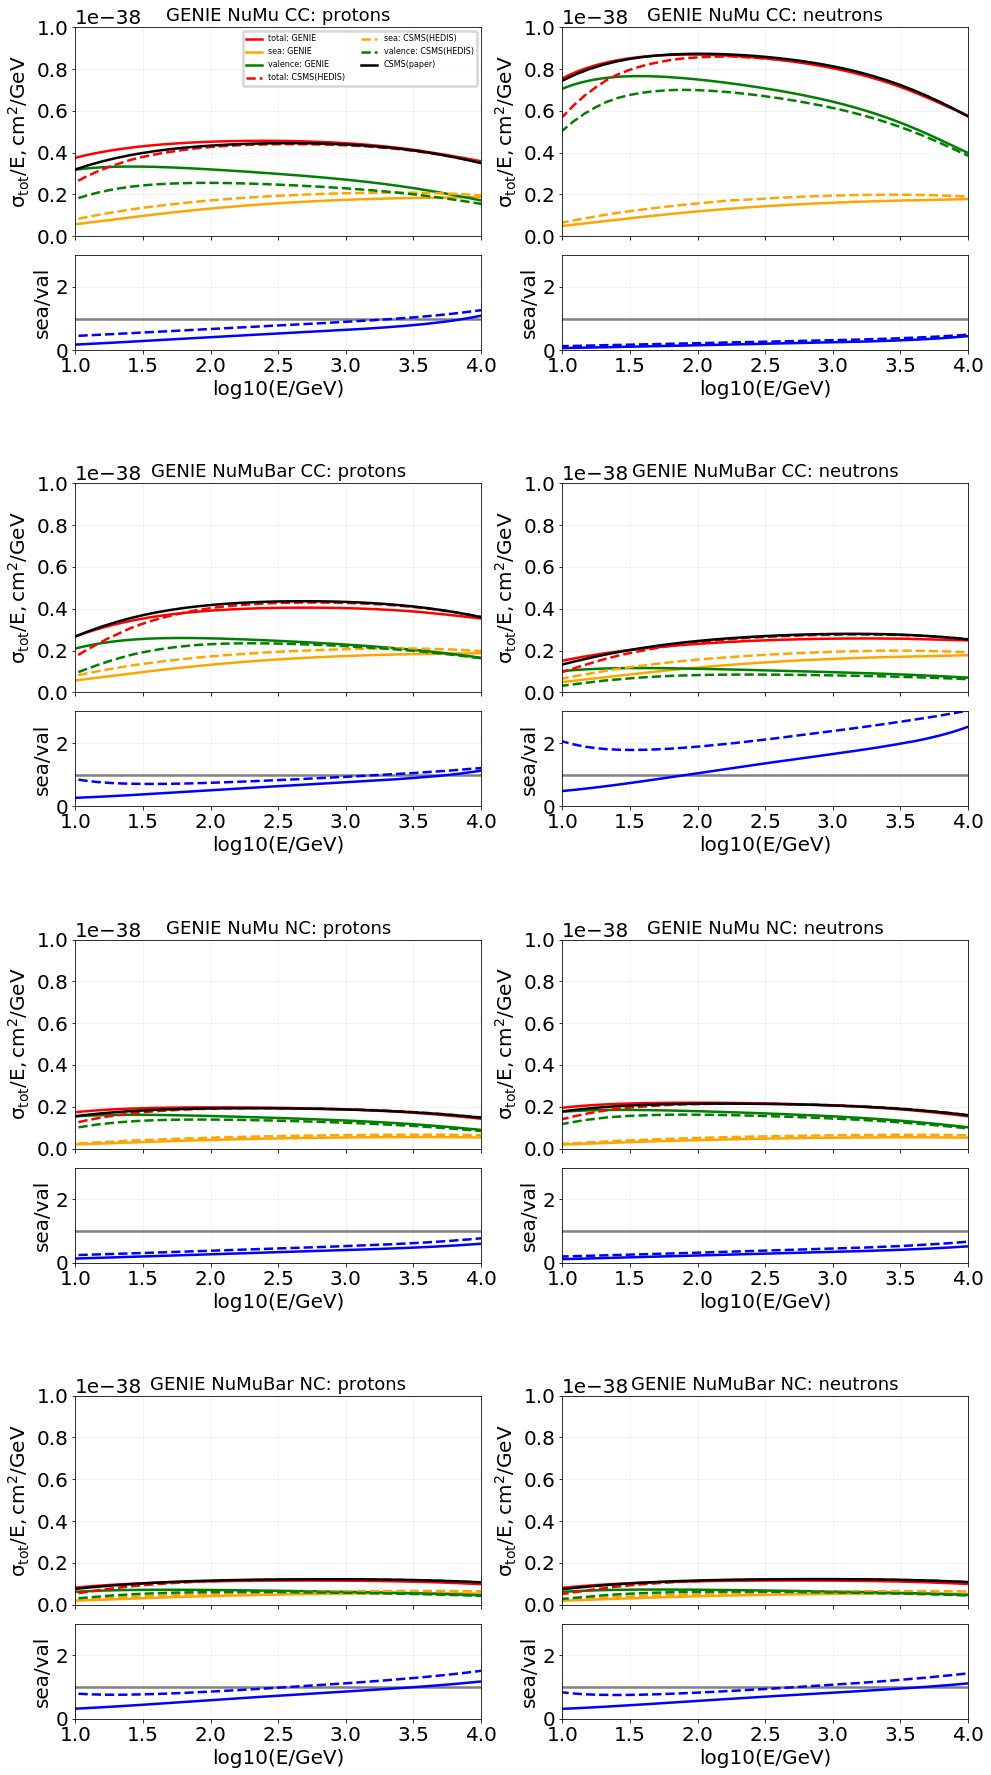

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:174: RuntimeWarning: invalid value encountered in true_divide


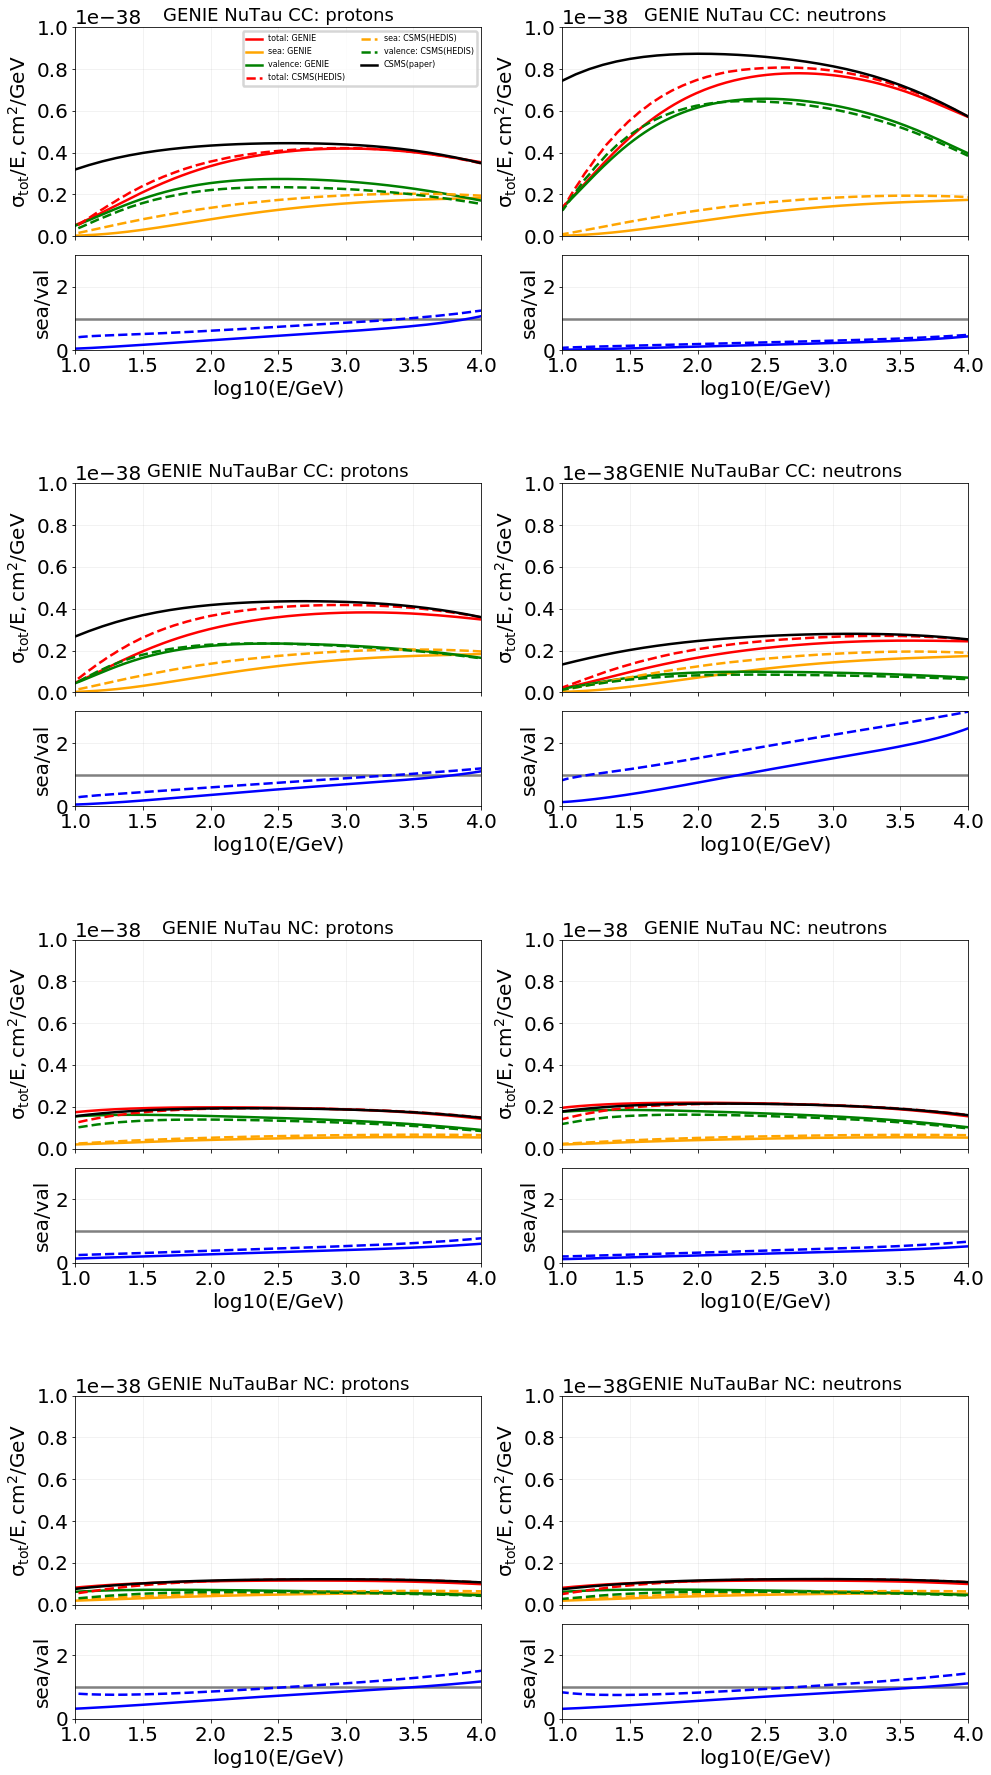

0

In [60]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

plot_unit(fnames=[g2_file,hedis_file], nu=14)
# plot_unit(fnames=[g2_file,hedis_file], nu=12)
plot_unit(fnames=[g2_file,hedis_file], nu=16)

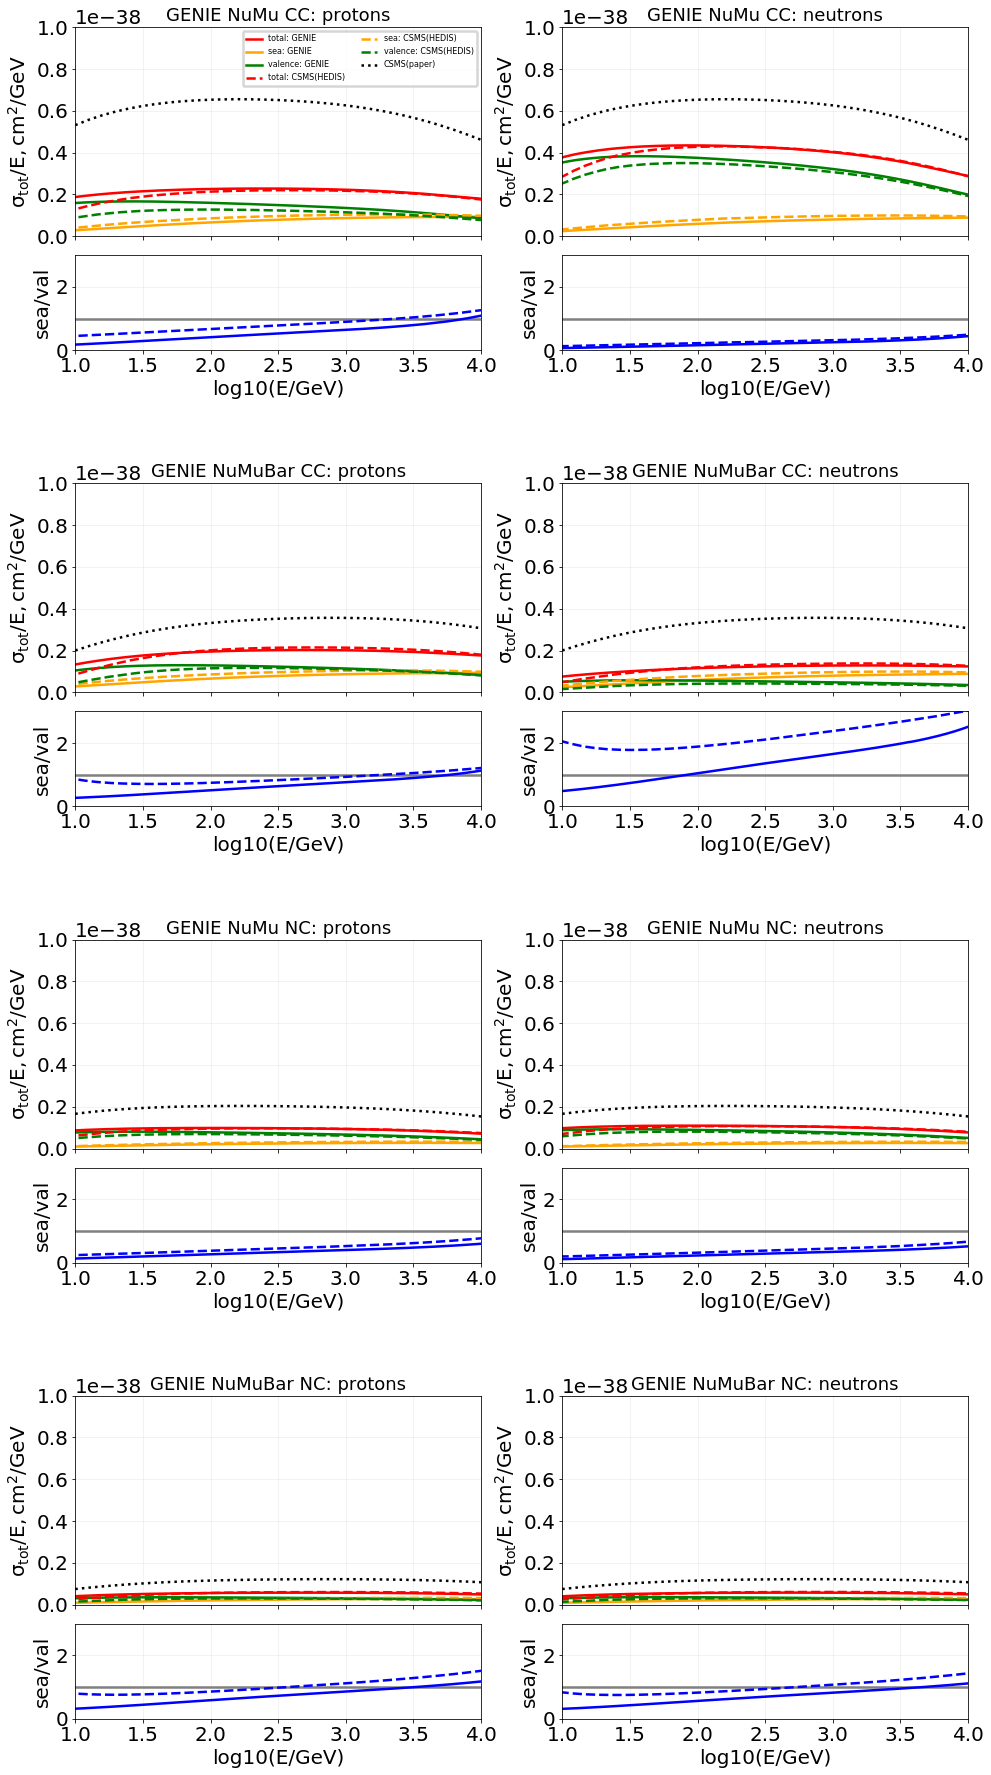

0

In [15]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

plot_unit(fnames=[g2_file,hedis_file], nu=14, plot_iso=True)
# plot_unit(fnames=[g2_file,hedis_file], nu=12, plot_iso=True)
# plot_unit(fnames=[g2_file,hedis_file], nu=16, plot_iso=True)

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:144: RuntimeWarning: invalid value encountered in true_divide


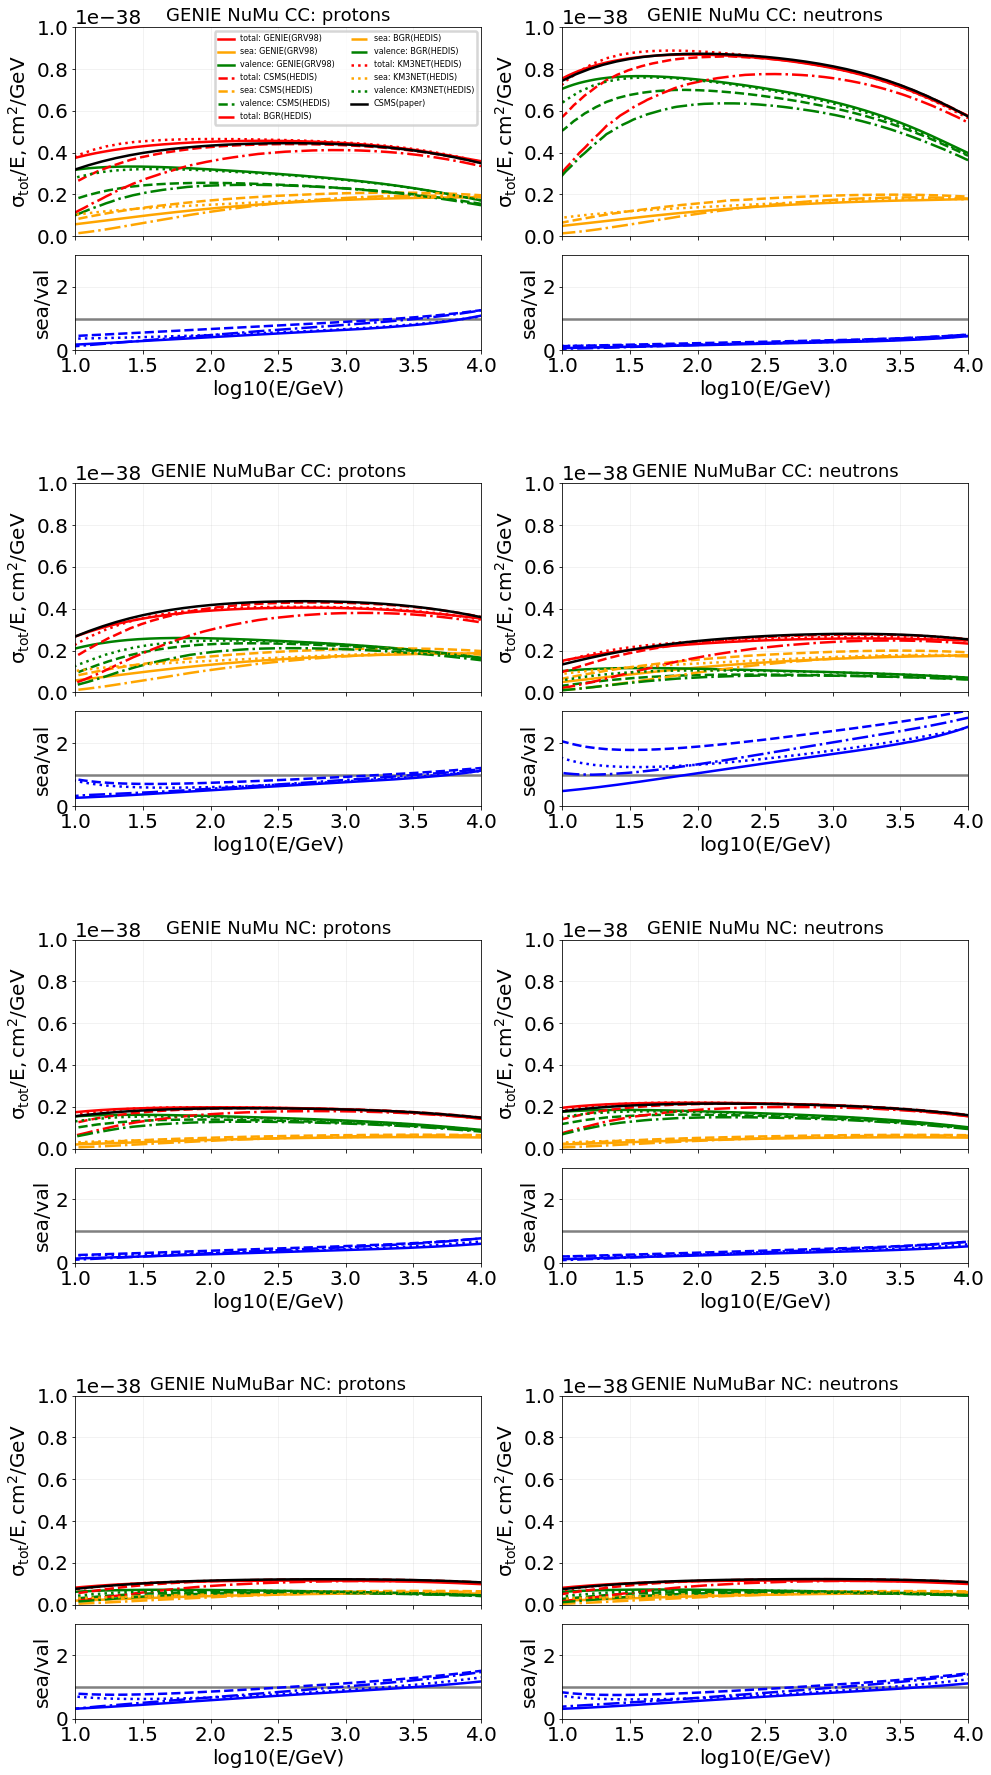

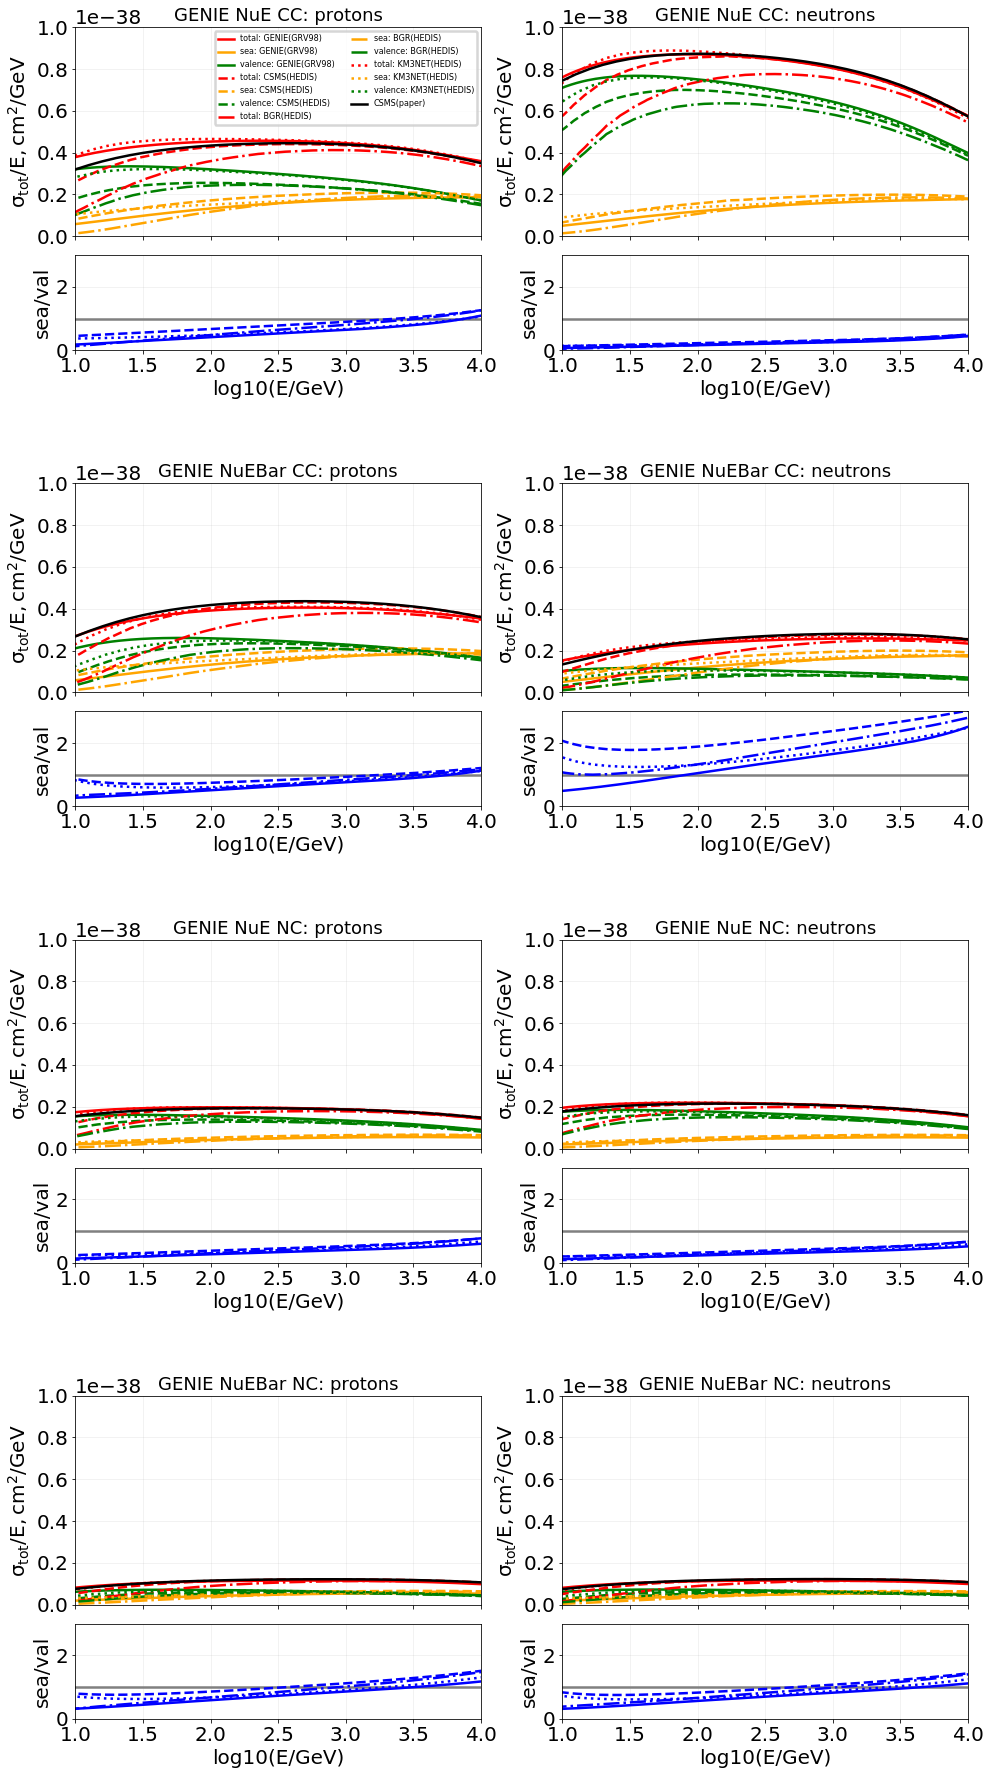

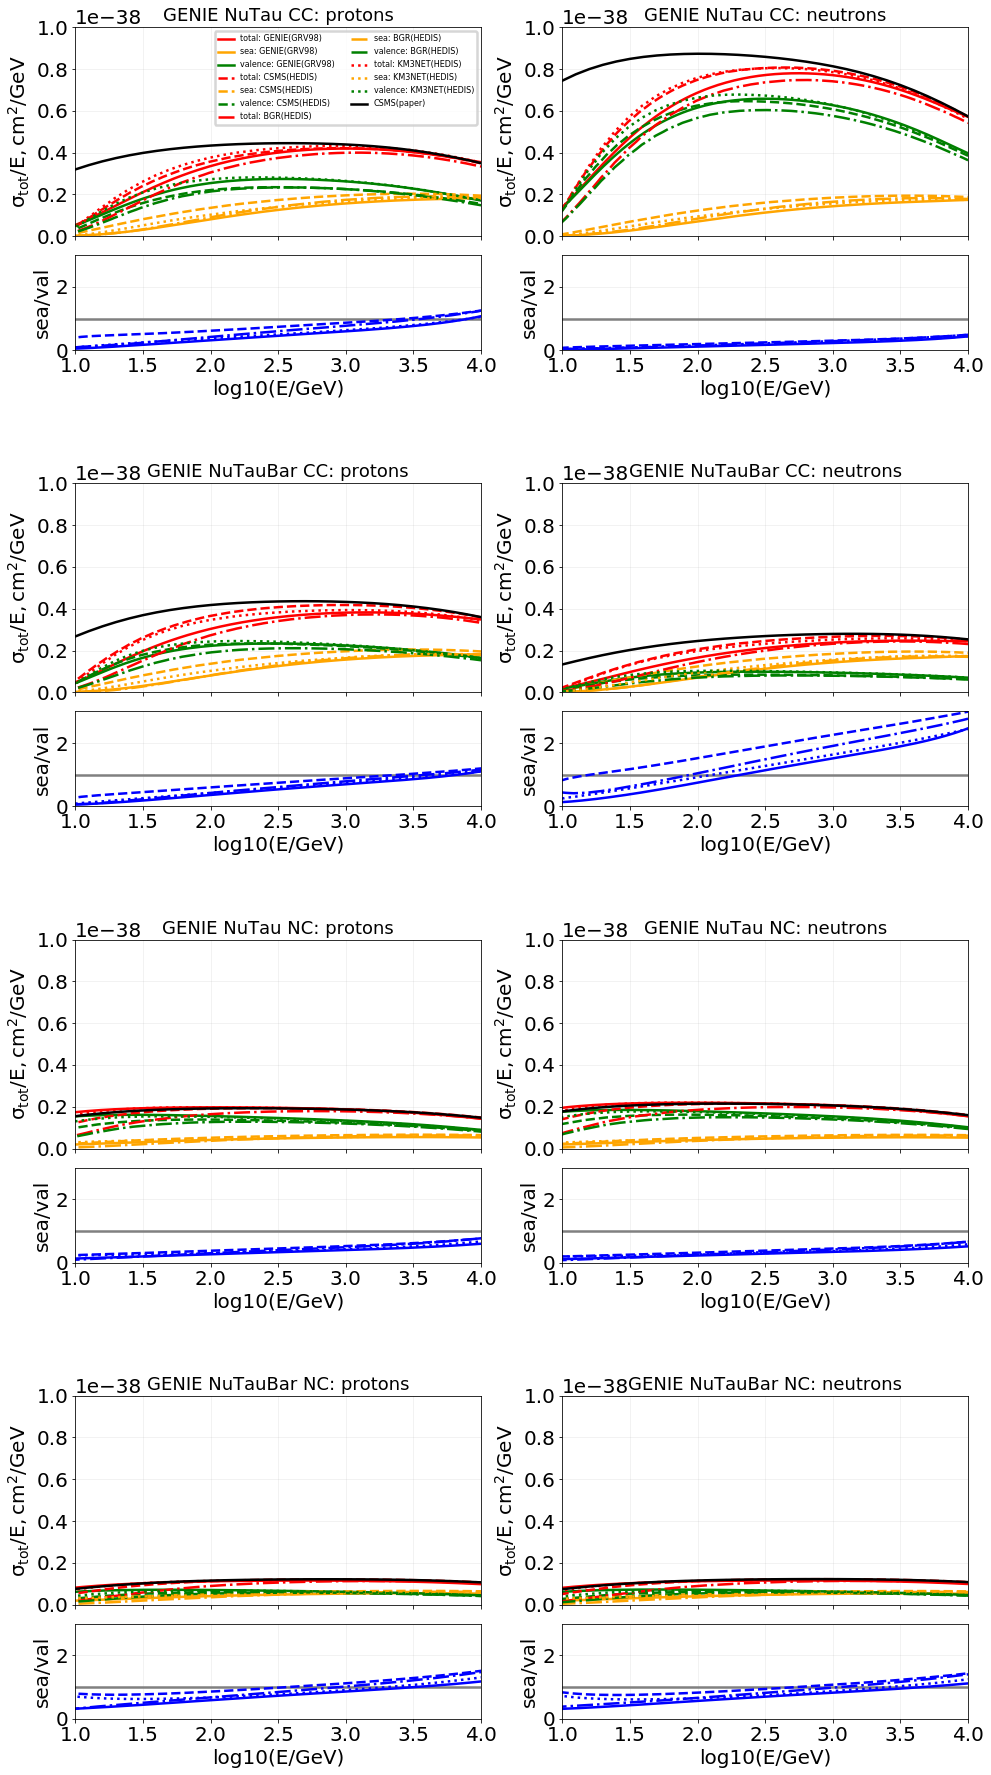

0

In [12]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
hedis_bgr_file = 'GENIE_HEDIS_water_splines_n50_BGR_fits.pckl'
hedis_km3net_file = 'GENIE_HEDIS_water_splines_n50_KM3NET_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

files=[g2_file,hedis_file,hedis_bgr_file,hedis_km3net_file]
hedis_models=['','CSMS','BGR','KM3NET']
genie_dets=['(GRV98)','','','']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets)
plot_unit(fnames=files, nu=12, hedis_model=hedis_models, genie_det=genie_dets)
plot_unit(fnames=files, nu=16, hedis_model=hedis_models, genie_det=genie_dets)

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:144: RuntimeWarning: invalid value encountered in true_divide


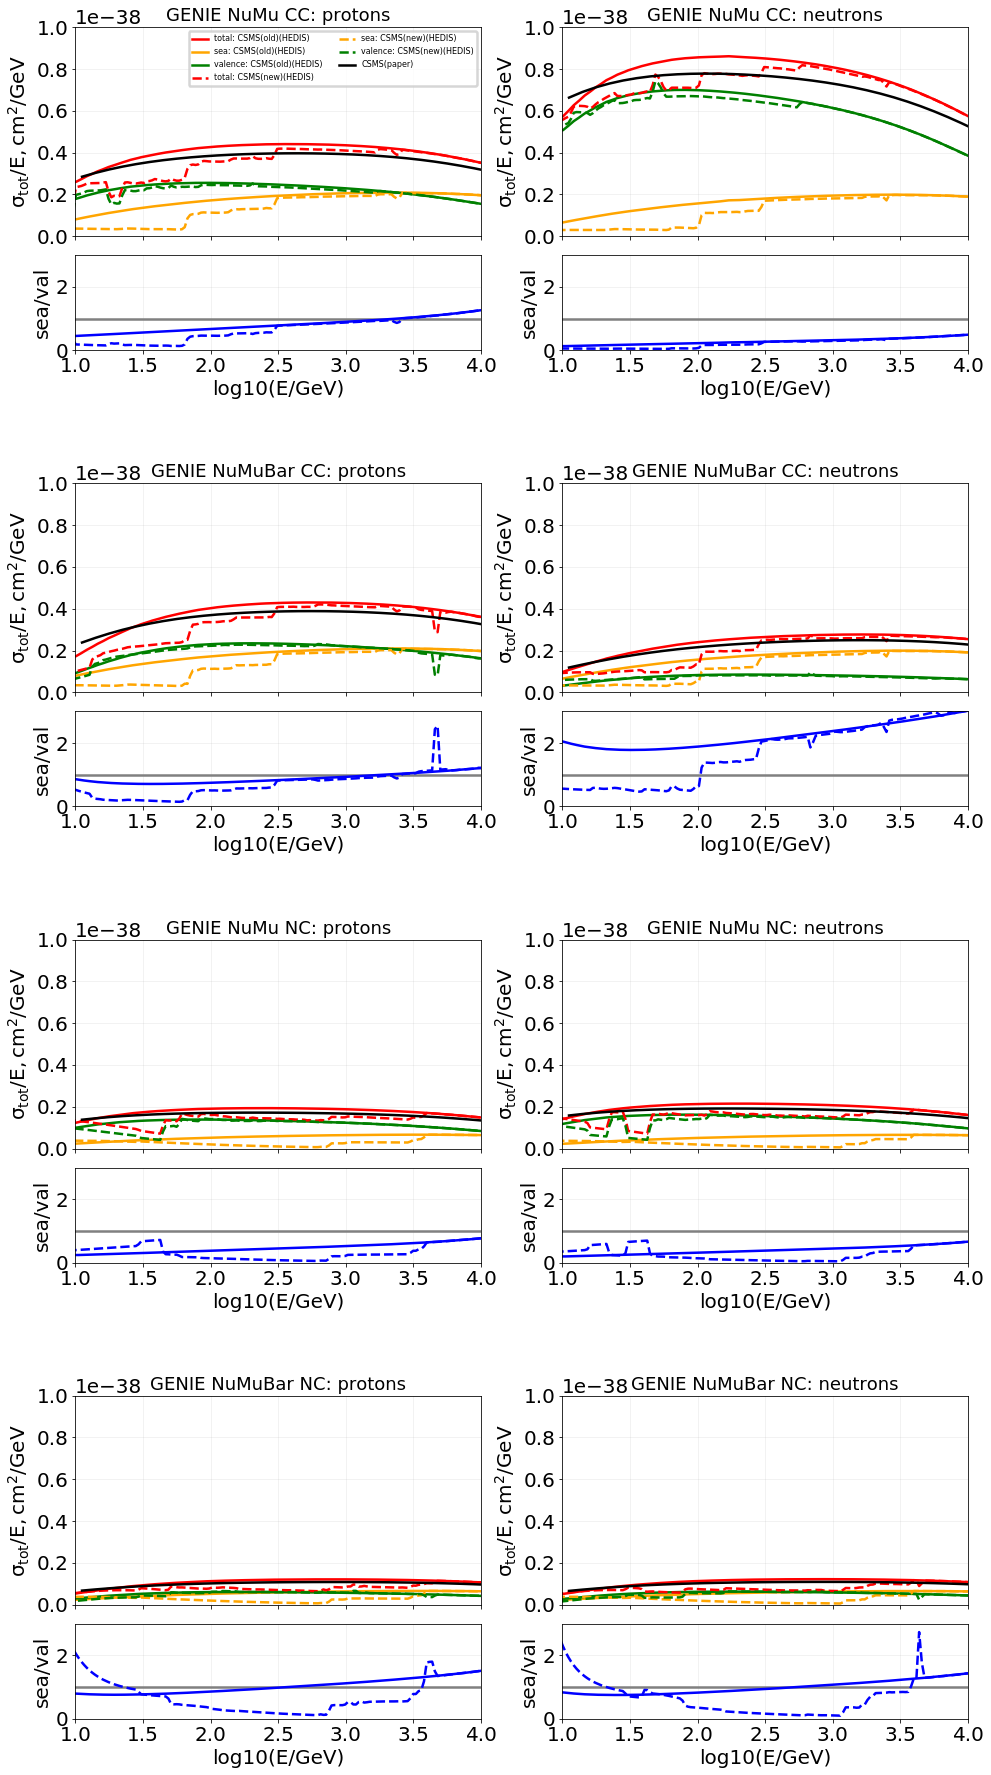

0

In [21]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
hedis_bgr_file = 'GENIE_HEDIS_water_splines_n50_BGR_fits.pckl'
hedis_km3net_file = 'GENIE_HEDIS_water_splines_n50_KM3NET_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'
hedis_csms='GENIE_HEDIS_water_splines_CSMS_fits.pckl'
hedis_km3net='GENIE_HEDIS_water_splines_KM3NET_fits.pckl'

files=[hedis_file, hedis_csms]
hedis_models=['CSMS(old)','CSMS(new)']
# genie_dets=['(GRV98)','','','']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets)
# plot_unit(fnames=files, nu=12, hedis_model=hedis_models, genie_det=genie_dets)
# plot_unit(fnames=files, nu=16, hedis_model=hedis_models, genie_det=genie_dets)

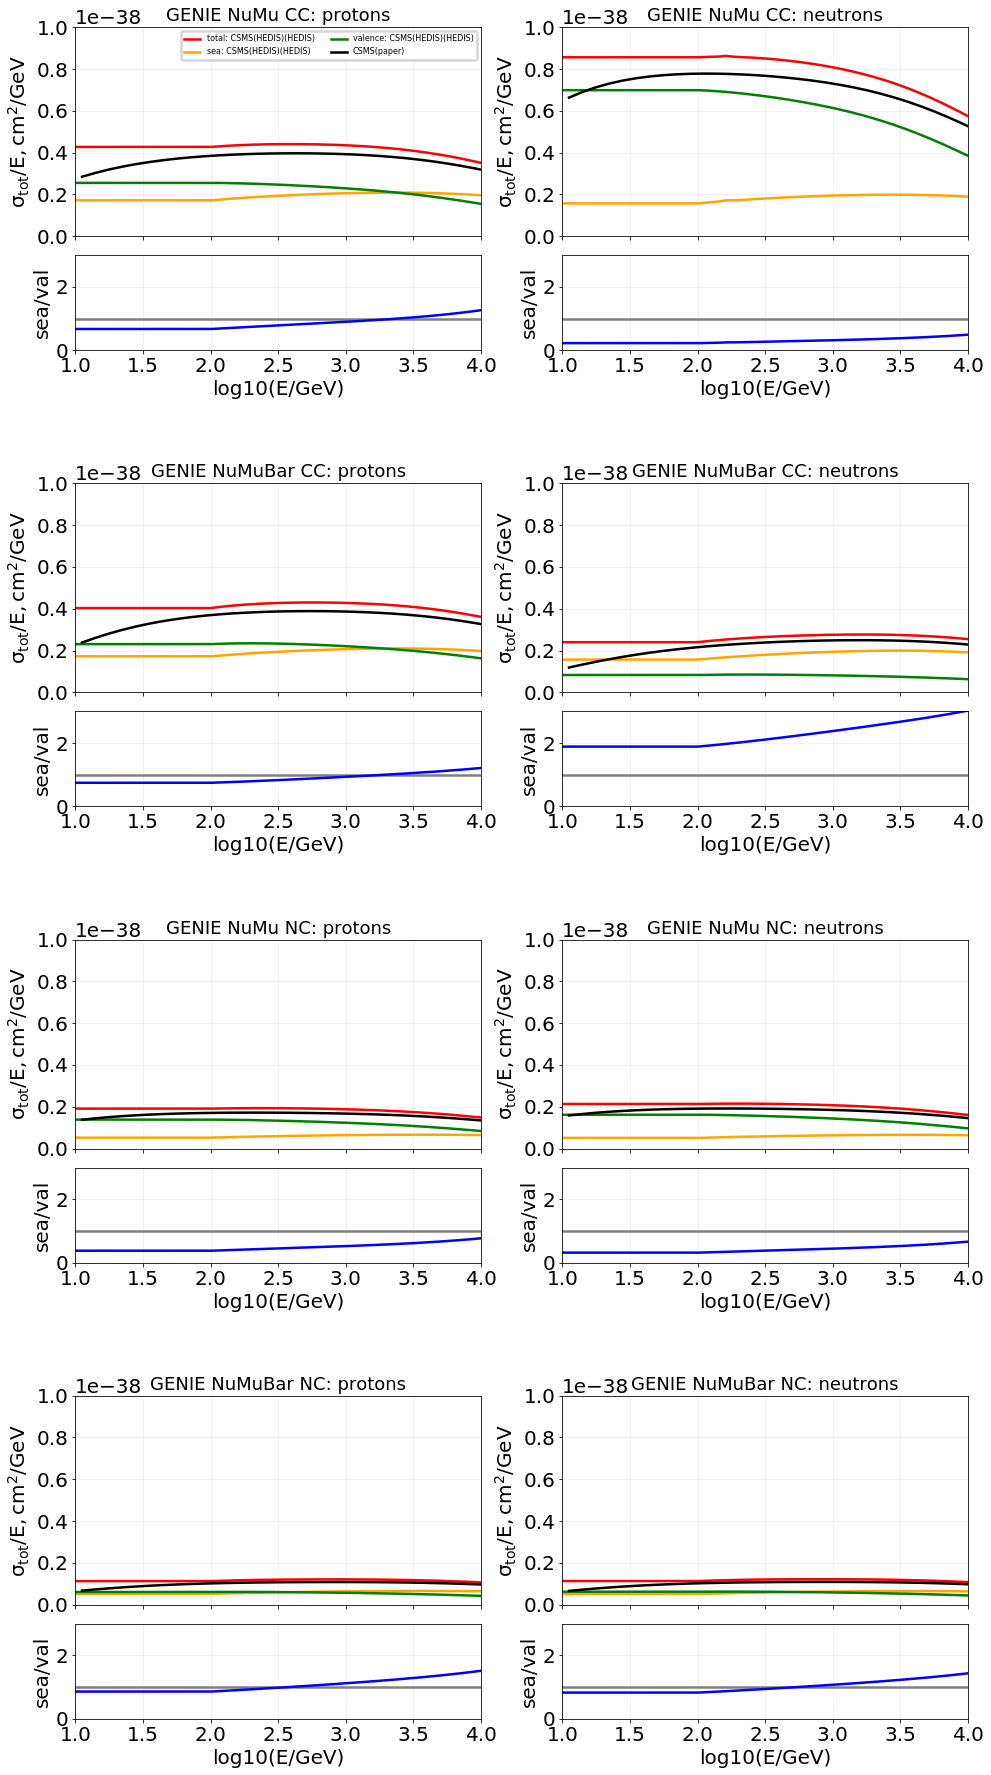

0

In [22]:
def_csms_hedis='GHE19_00b_00_000_fits.pckl'

files=[def_csms_hedis]
hedis_models=['CSMS(HEDIS)']
genie_dets=['']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets)

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:144: RuntimeWarning: invalid value encountered in true_divide


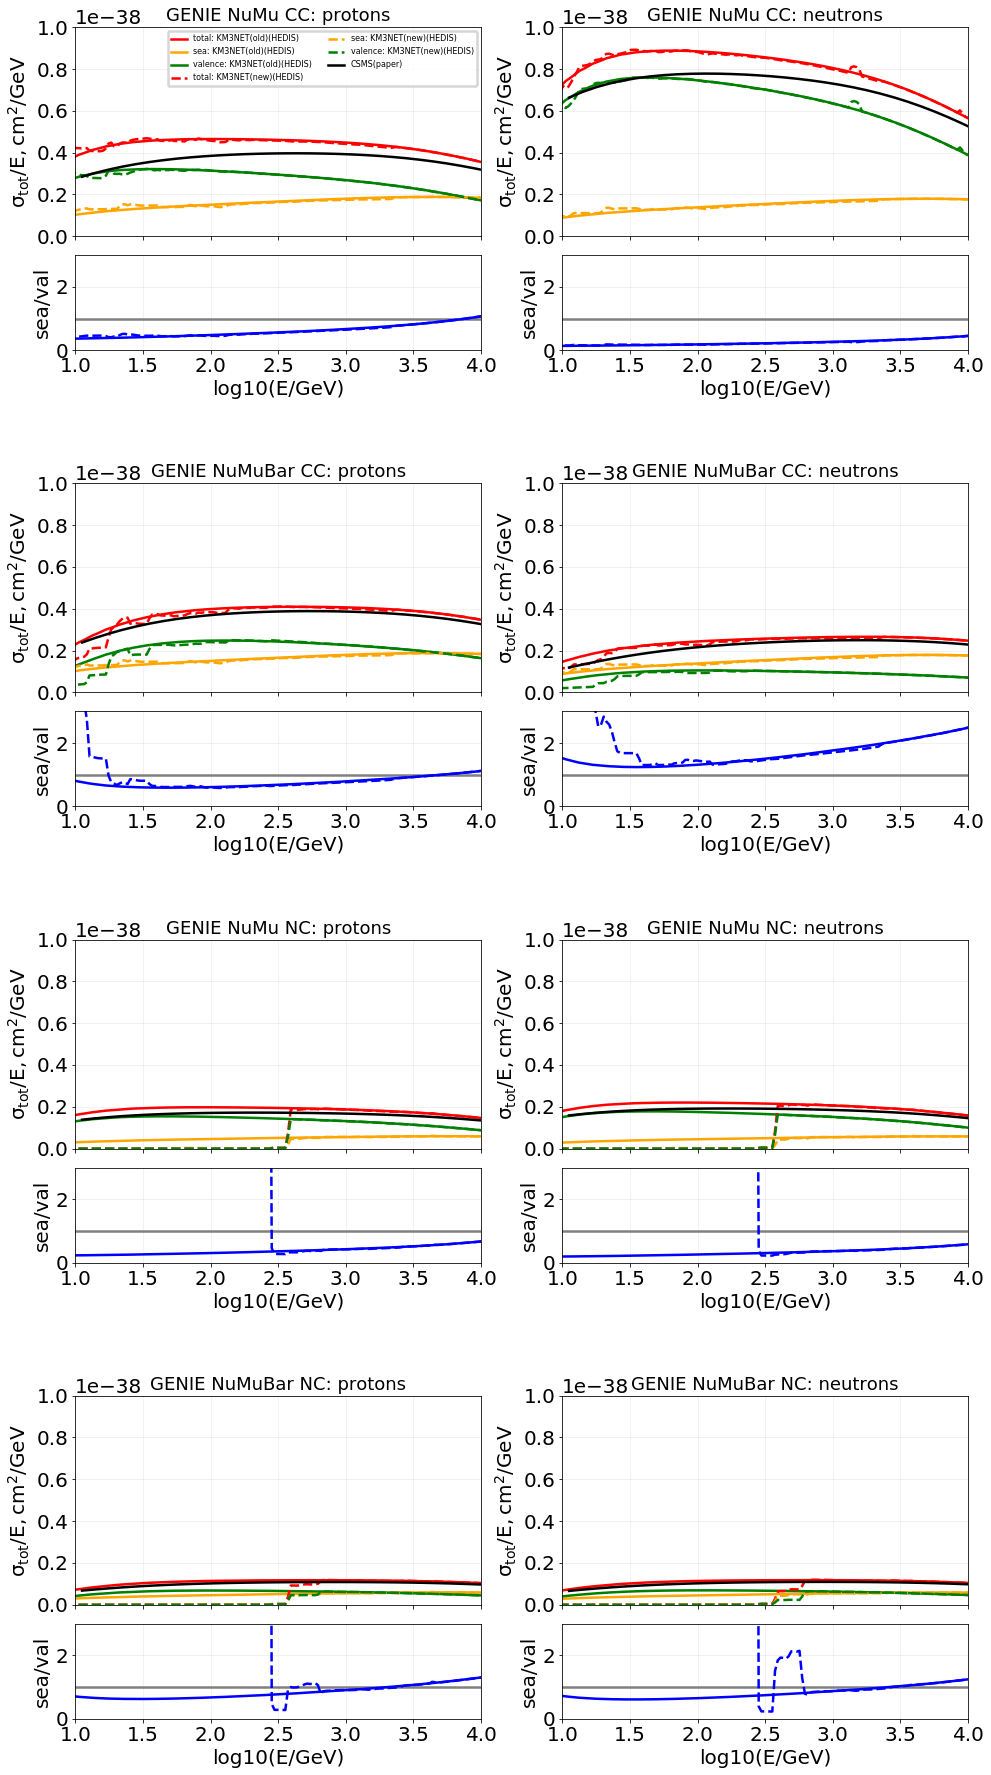

0

In [19]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
hedis_bgr_file = 'GENIE_HEDIS_water_splines_n50_BGR_fits.pckl'
hedis_km3net_file = 'GENIE_HEDIS_water_splines_n50_KM3NET_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'
hedis_csms='GENIE_HEDIS_water_splines_CSMS_fits.pckl'
hedis_km3net='GENIE_HEDIS_water_splines_KM3NET_fits.pckl'

files=[hedis_km3net_file, hedis_km3net]
hedis_models=['KM3NET(old)','KM3NET(new)']
# genie_dets=['(GRV98)','','','']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets)
# plot_unit(fnames=files, nu=12, hedis_model=hedis_models, genie_det=genie_dets)
# plot_unit(fnames=files, nu=16, hedis_model=hedis_models, genie_det=genie_dets)

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in true_divide


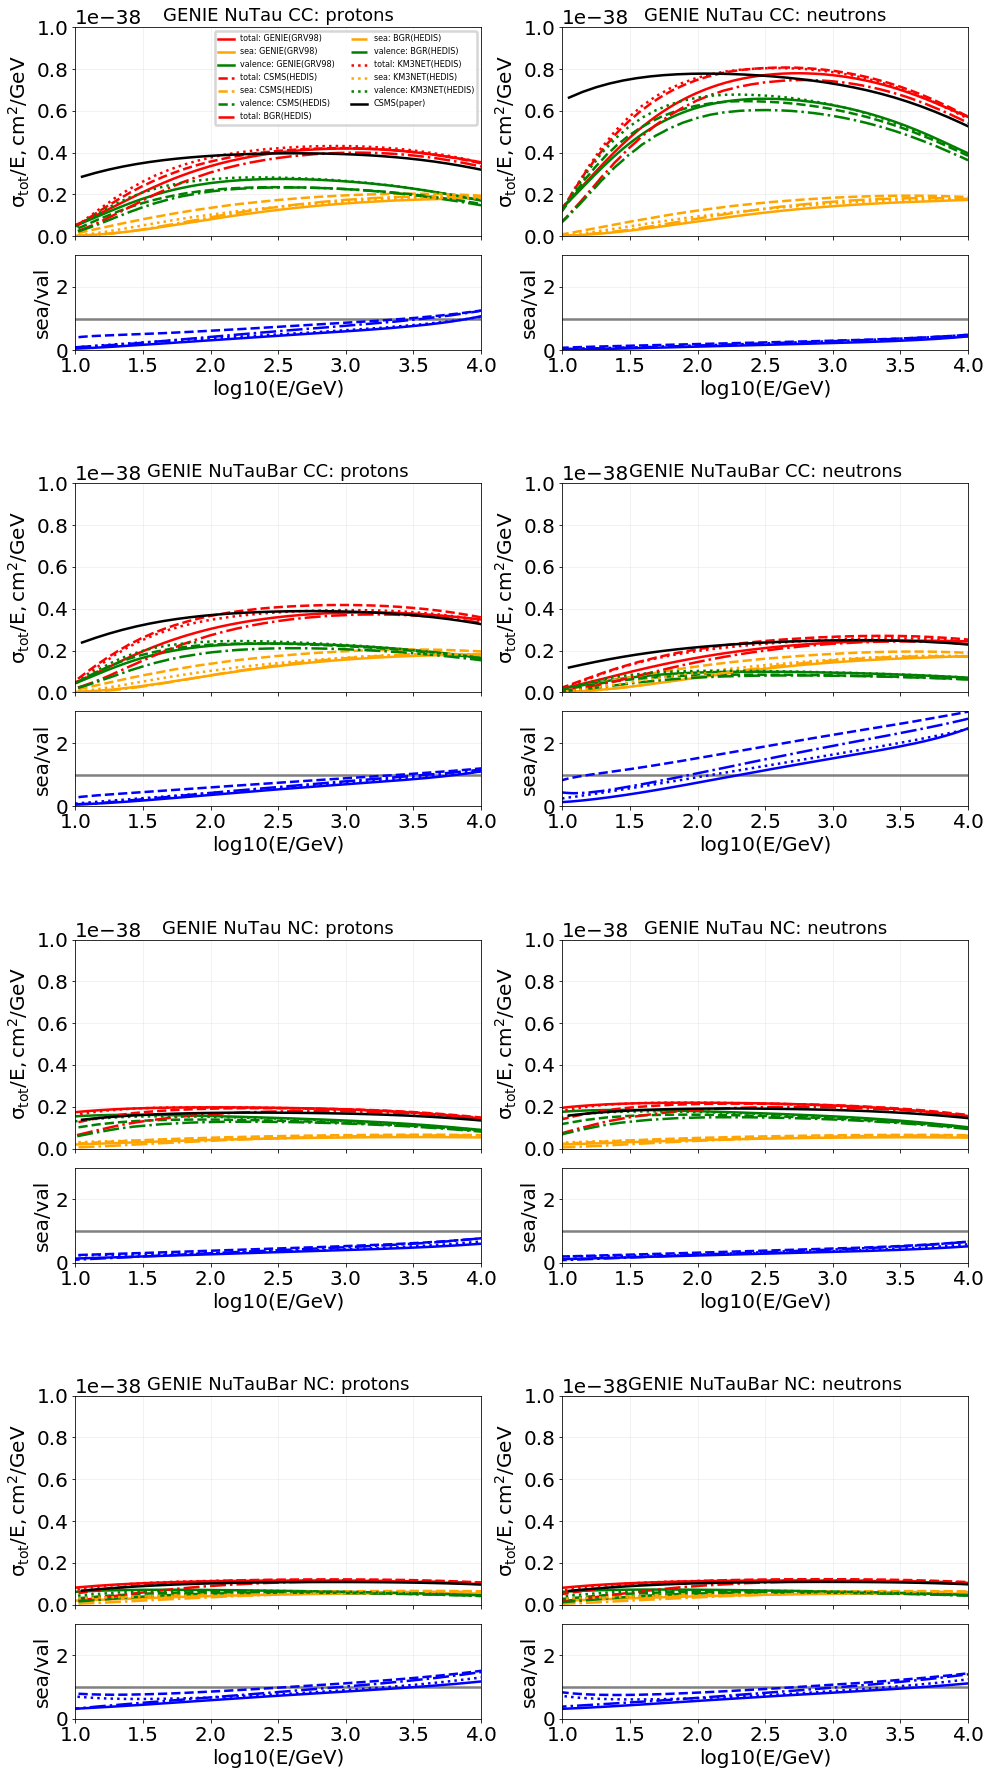

0

In [54]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
hedis_bgr_file = 'GENIE_HEDIS_water_splines_n50_BGR_fits.pckl'
hedis_km3net_file = 'GENIE_HEDIS_water_splines_n50_KM3NET_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

files=[g2_file,hedis_file,hedis_bgr_file,hedis_km3net_file]
hedis_models=['','CSMS','BGR','KM3NET']
genie_dets=['(GRV98)','','','']

plot_unit(fnames=files, nu=16, hedis_model=hedis_models, genie_det=genie_dets)

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in true_divide


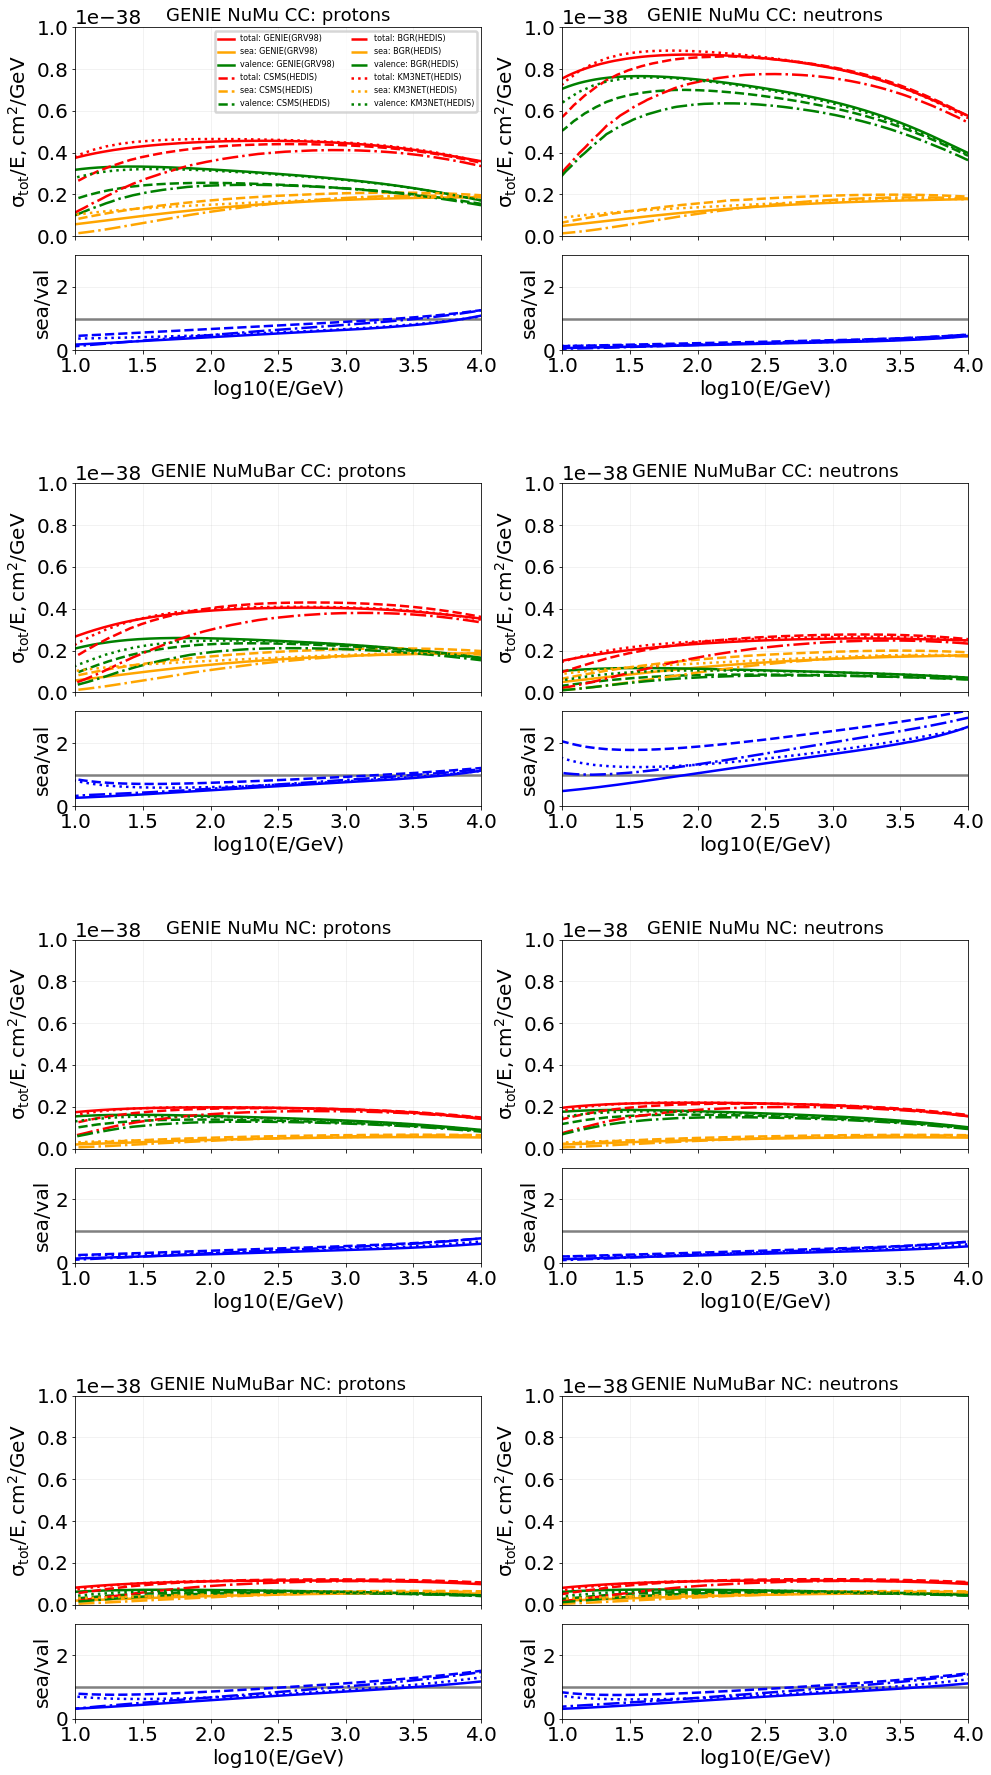

0

In [43]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
hedis_bgr_file = 'GENIE_HEDIS_water_splines_n50_BGR_fits.pckl'
hedis_km3net_file = 'GENIE_HEDIS_water_splines_n50_KM3NET_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

files=[g2_file,hedis_file,hedis_bgr_file,hedis_km3net_file]
hedis_models=['','CSMS','BGR','KM3NET']
genie_dets=['(GRV98)','','','']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets, plot_csms=False)
# plot_unit(fnames=files, nu=12, hedis_model=hedis_models, genie_det=genie_dets)
# plot_unit(fnames=files, nu=16, hedis_model=hedis_models, genie_det=genie_dets)

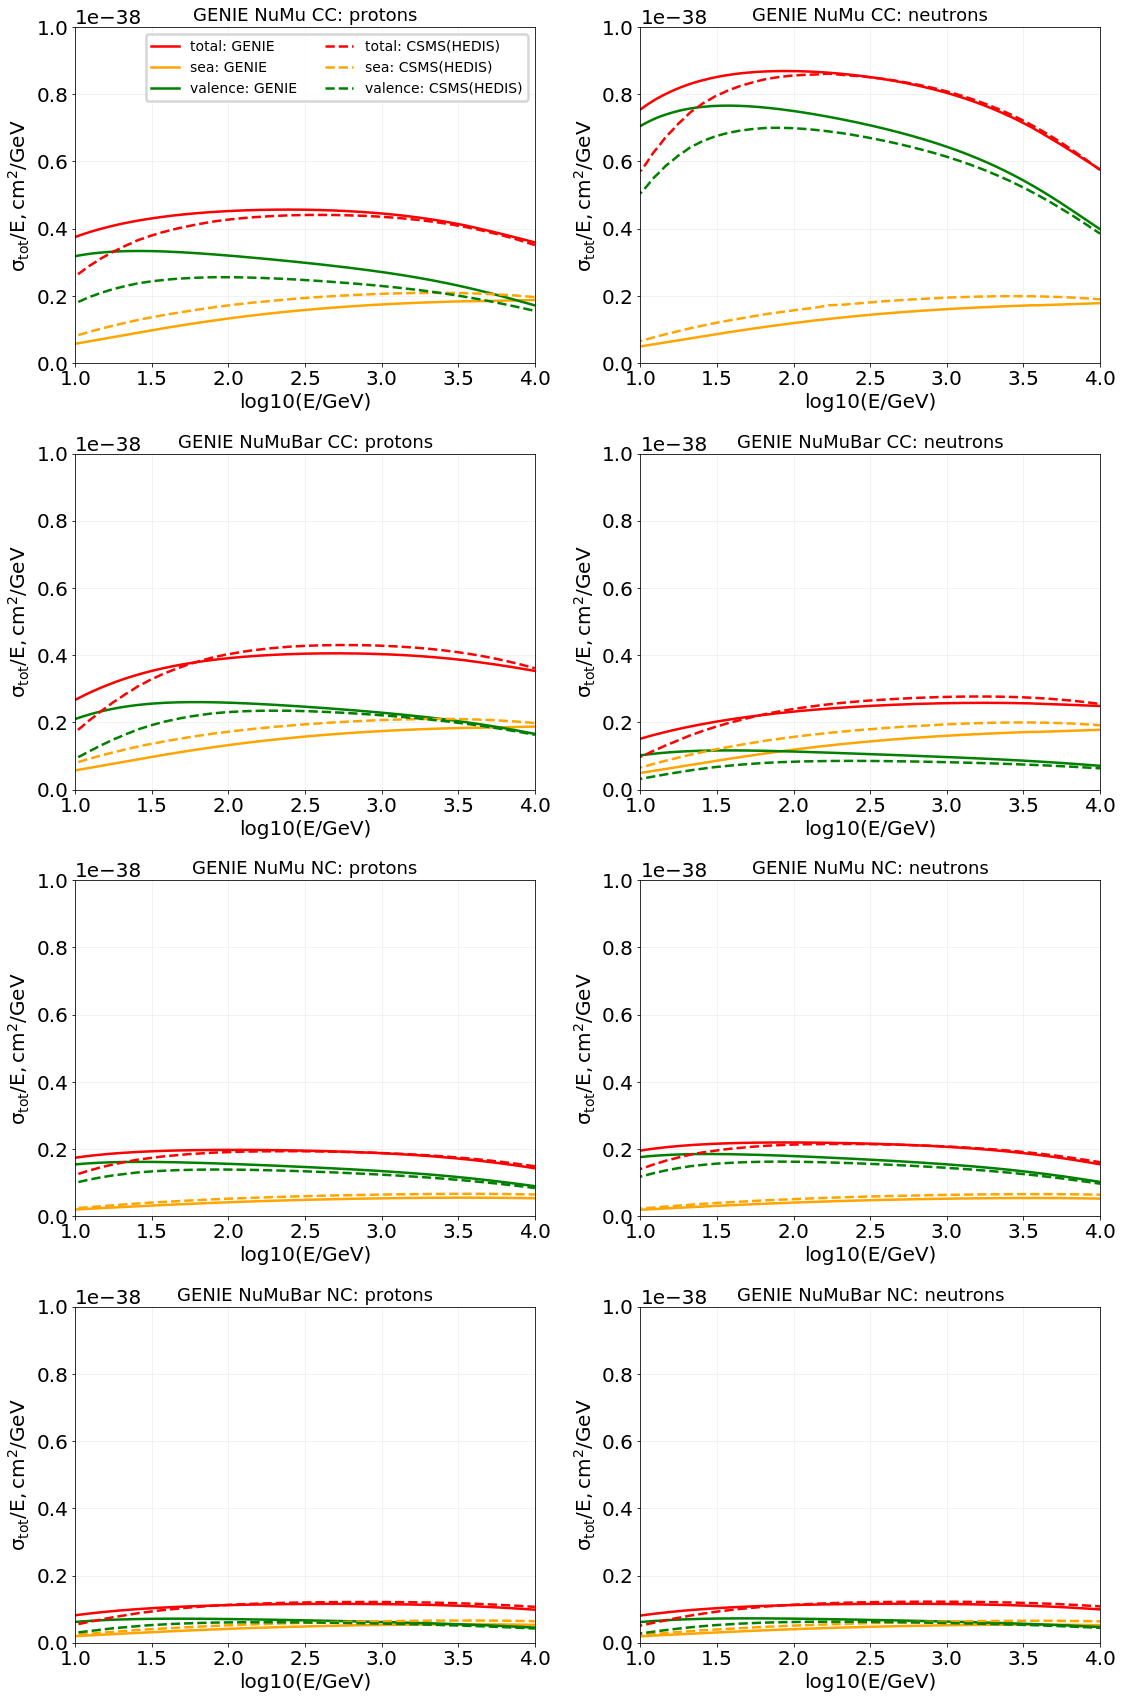

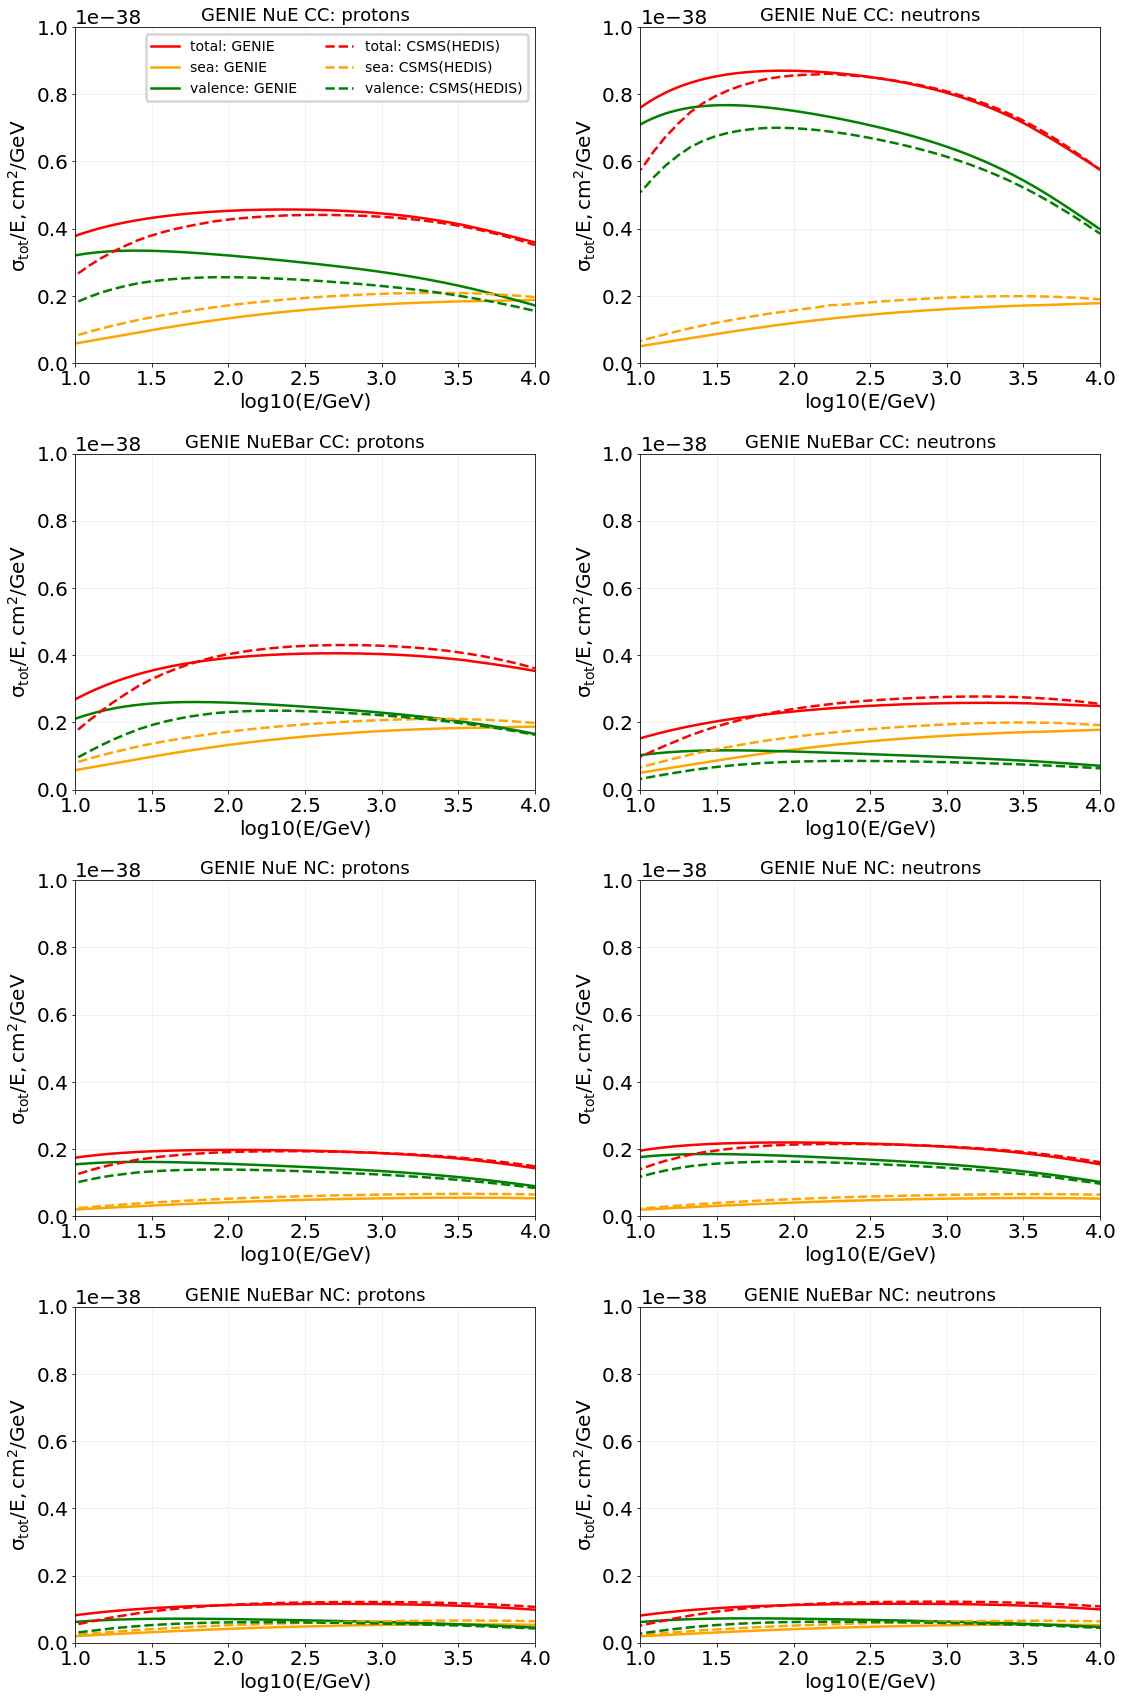

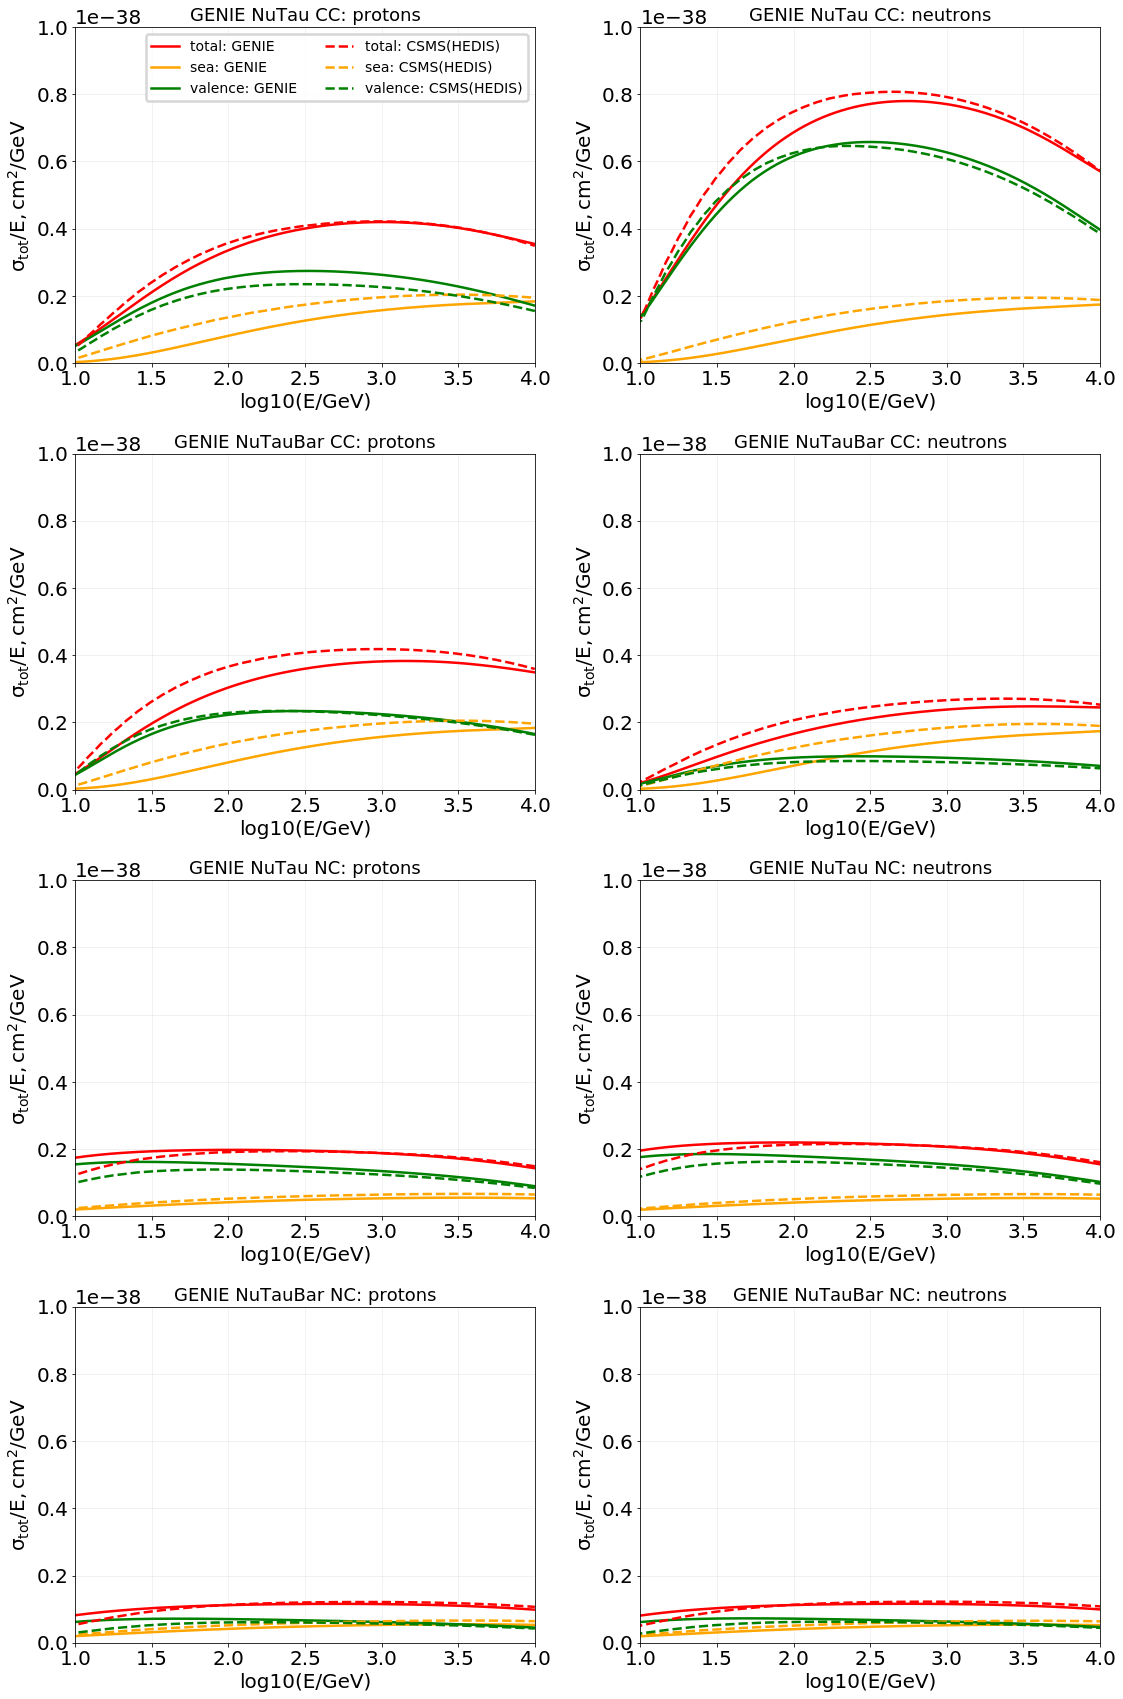

0

In [41]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

plot_unit(fnames=[g2_file,hedis_file], nu=14)
plot_unit(fnames=[g2_file,hedis_file], nu=12)
plot_unit(fnames=[g2_file,hedis_file], nu=16)

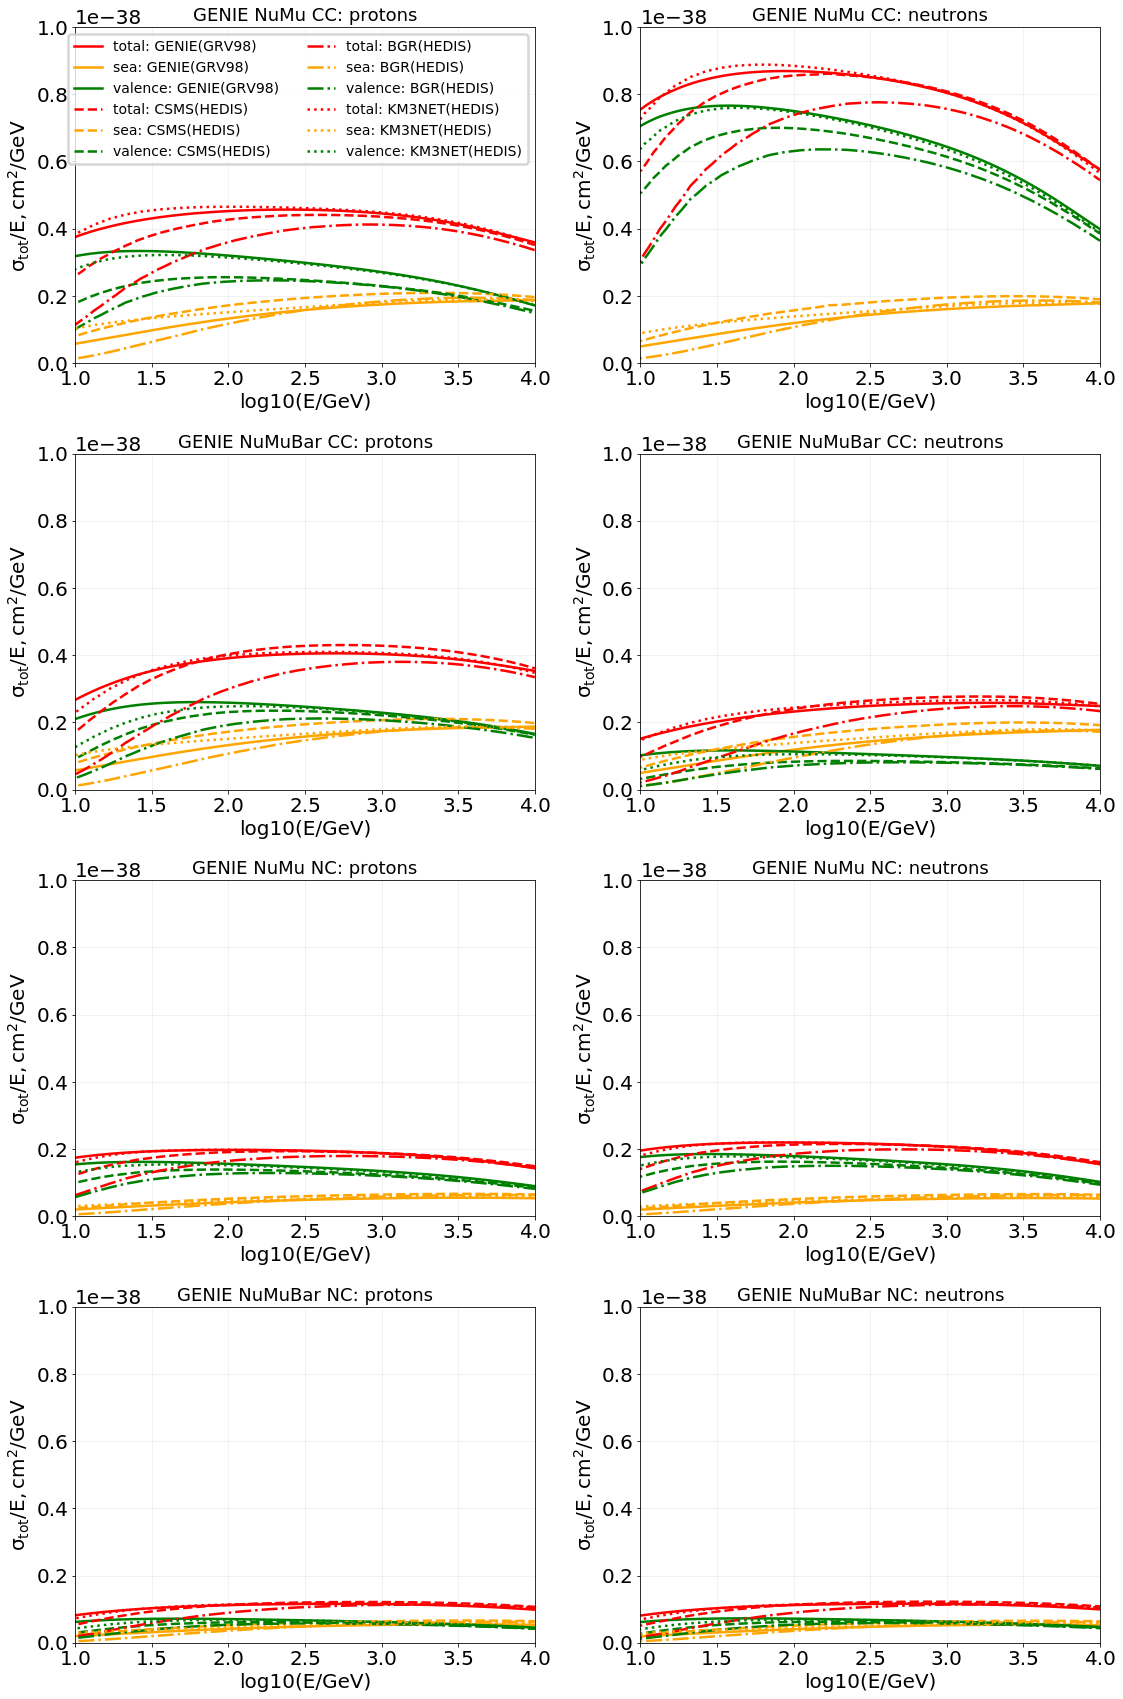

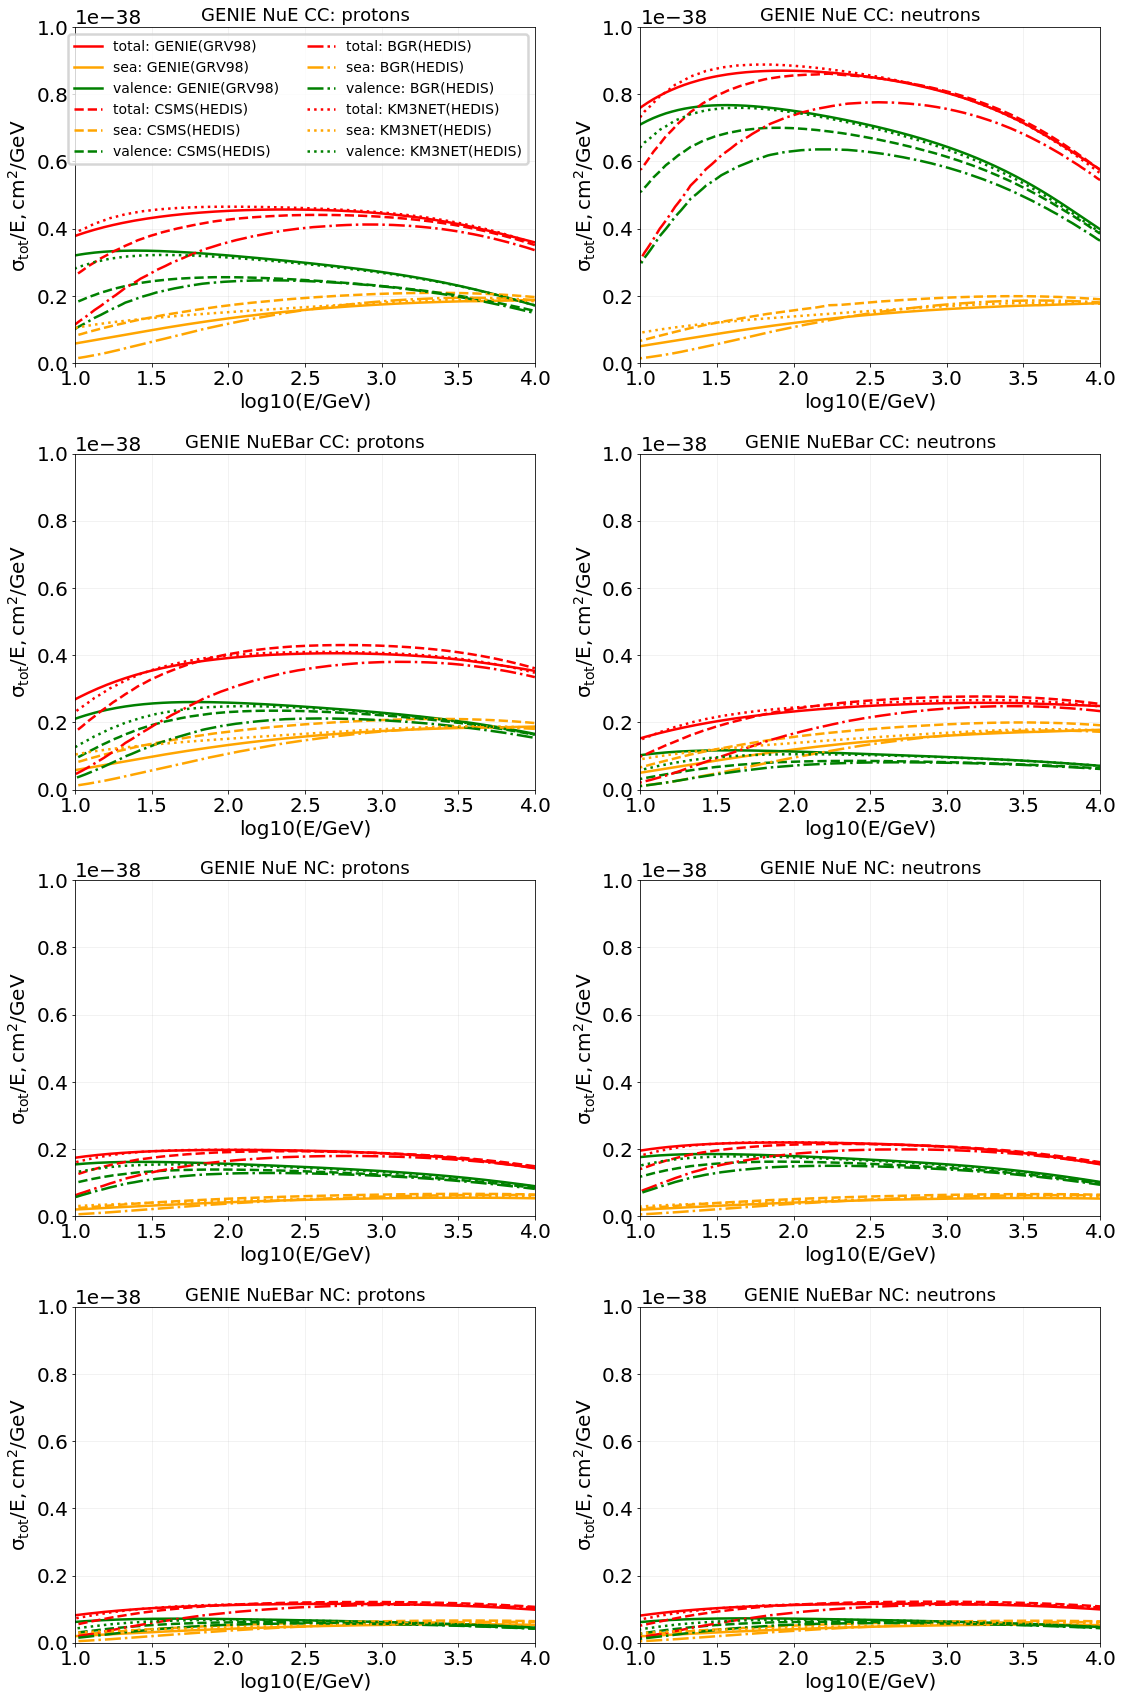

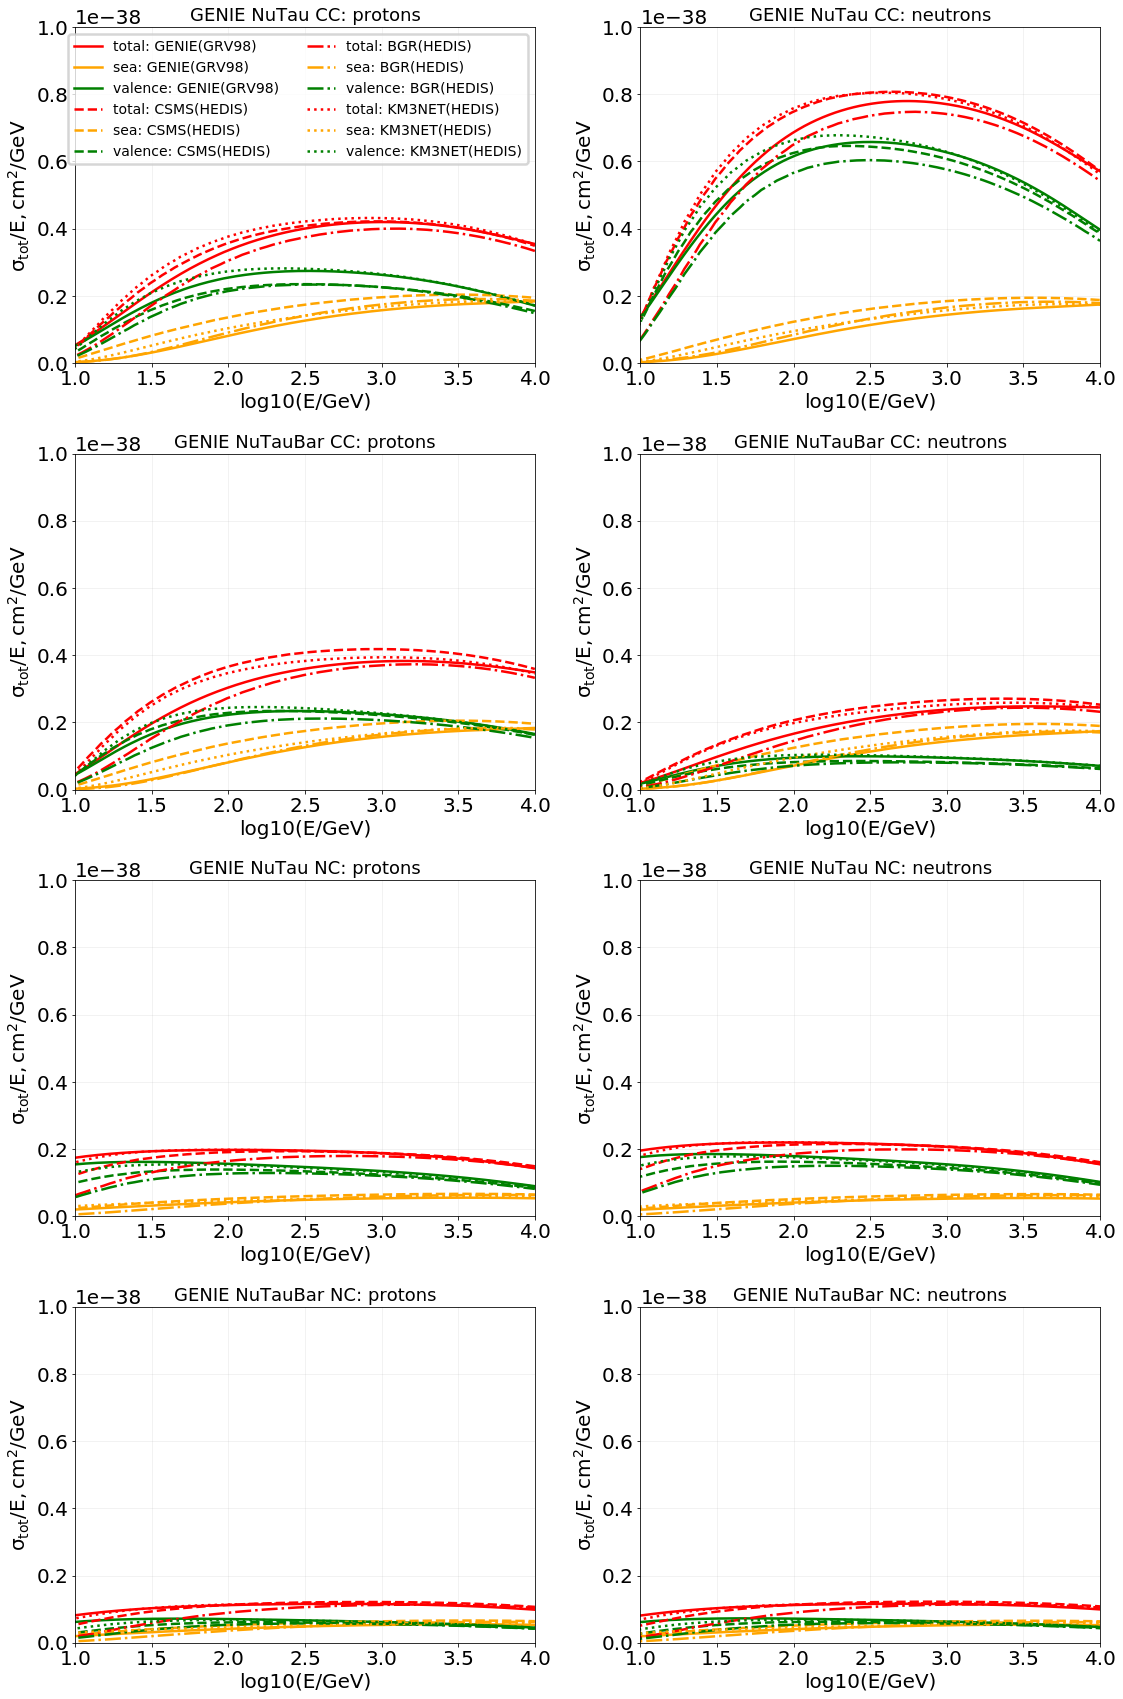

0

In [45]:
hedis_file = 'GENIE_HEDIS_water_splines_n50_fits.pckl'
hedis_bgr_file = 'GENIE_HEDIS_water_splines_n50_BGR_fits.pckl'
hedis_km3net_file = 'GENIE_HEDIS_water_splines_n50_KM3NET_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

files=[g2_file,hedis_file,hedis_bgr_file,hedis_km3net_file]
hedis_models=['','CSMS','BGR','KM3NET']
genie_dets=['(GRV98)','','','']

plot_unit(fnames=files, nu=14, hedis_model=hedis_models, genie_det=genie_dets)
plot_unit(fnames=files, nu=12, hedis_model=hedis_models, genie_det=genie_dets)
plot_unit(fnames=files, nu=16, hedis_model=hedis_models, genie_det=genie_dets)

# Wcut=0 check

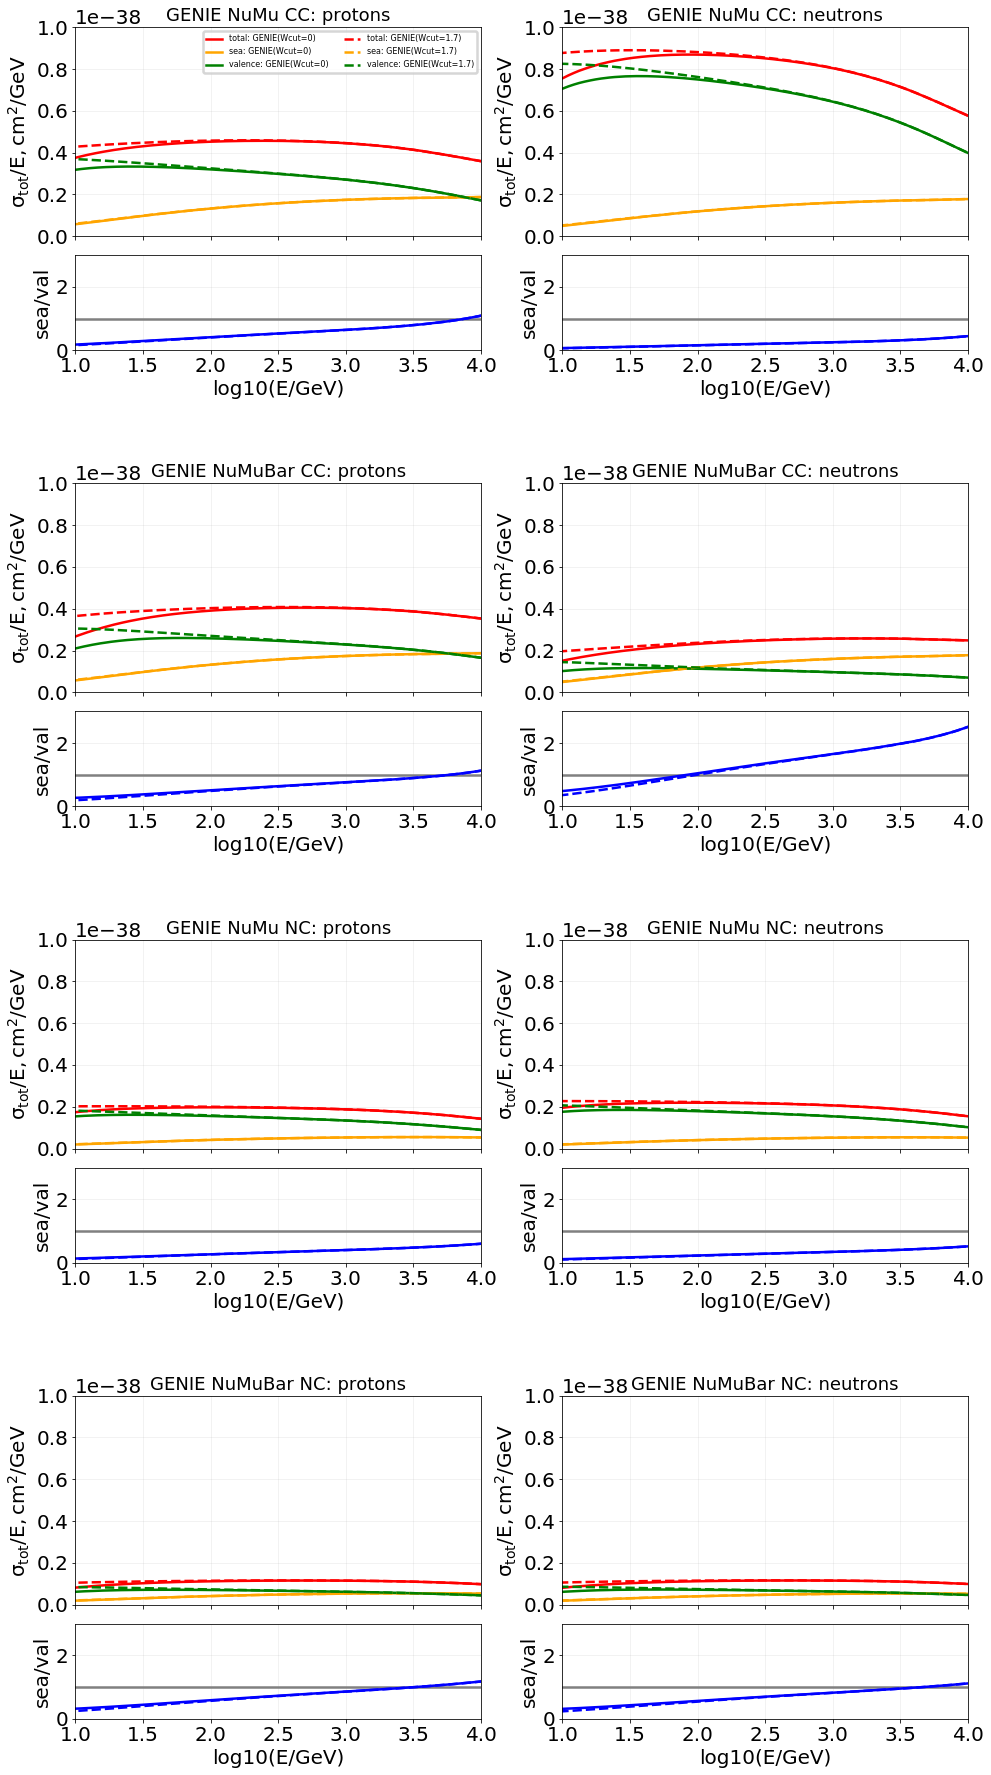

0

In [57]:
hedis_file = 'GENIE_2_12_8_water_splines_highen_Wcut0_fits.pckl'
g2_file = 'GENIE_2_12_8_water_splines_highen_fits.pckl'

plot_unit(fnames=[g2_file,hedis_file], nu=14, 
          genie_det=['(Wcut=0)','(Wcut=1.7)'], plot_csms=False)


In [ ]:
def plot_ind_iso(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det='', linestyle='-'):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    if 'int_hedis' in genie.keys():
        gen = hedis_model+'(HEDIS)'
    else:
        gen = 'GENIE'+genie_det
        
    tgt = tgt_by_Npdg(hitN)

    ind_base = (genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)
    
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_base], axis=0)*conv,
            c='red', linestyle=linestyle, label='total: '+gen)
    
    ind_sea = ind_base*(genie['sea']==1)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_sea], axis=0)*conv,
            c='orange', linestyle=linestyle, label='sea: '+gen)
    
    ind_val = ind_base*(genie['sea']==0)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_val], axis=0)*conv,
            c='green', linestyle=linestyle, label='valence: '+gen)
    
    return 0

In [ ]:
def plot_ind_iso(ax, filename, pdg=14, hitN=2212, CC=1, hedis_model='CSMS', genie_det='', linestyle='-'):
    with open(os.path.join(pth,filename), 'rb') as f:
        genie = pickle.load(f, encoding='latin1')
    for k in genie.keys():
        genie[k] = np.array(genie[k])
        
    if 'int_hedis' in genie.keys():
        gen = hedis_model+'(HEDIS)'
    else:
        gen = 'GENIE'+genie_det
        
    tgt = tgt_by_Npdg(hitN)

    ind_base_p = (genie['tgt']==2212)*(genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)
    ind_base_n = (genie['tgt']==2112)*(genie['pdg']==pdg)*\
    (genie['hitN']==hitN)*(genie['CC']==CC)
    
    xsec_iso = (np.sum(genie['xsec_fits'][ind_base_p], axis=0)+\
                np.sum(genie['xsec_fits'][ind_base_n], axis=0))*conv/2.
    
    ax.plot(np.log10(genie['E_fit']), xsec_iso,
            c='red', linestyle=linestyle, label='total: '+gen)
    
    ind_sea_p = ind_base_p*(genie['sea']==1)
    ind_sea_n = ind_base_n*(genie['sea']==1)
    
    
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_sea], axis=0)*conv,
            c='orange', linestyle=linestyle, label='sea: '+gen)
    
    ind_val = ind_base*(genie['sea']==0)
    ax.plot(np.log10(genie['E_fit']), np.sum(genie['xsec_fits'][ind_val], axis=0)*conv,
            c='green', linestyle=linestyle, label='valence: '+gen)
    
    return 0

# new splines

In [205]:
hedis_csms='GENIE_HEDIS_water_splines_CSMS_fits.pckl'
hedis_km3net='GENIE_HEDIS_water_splines_KM3NET_fits.pckl'

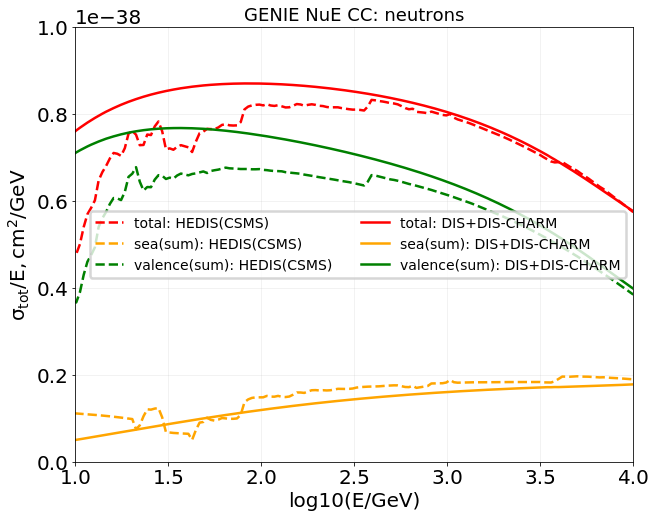

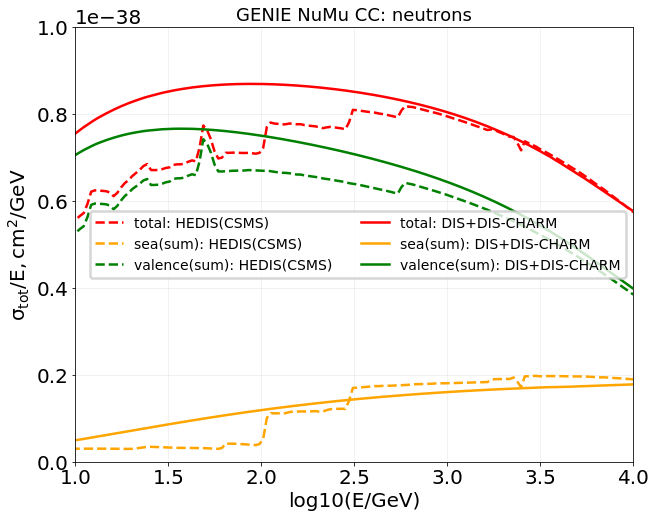

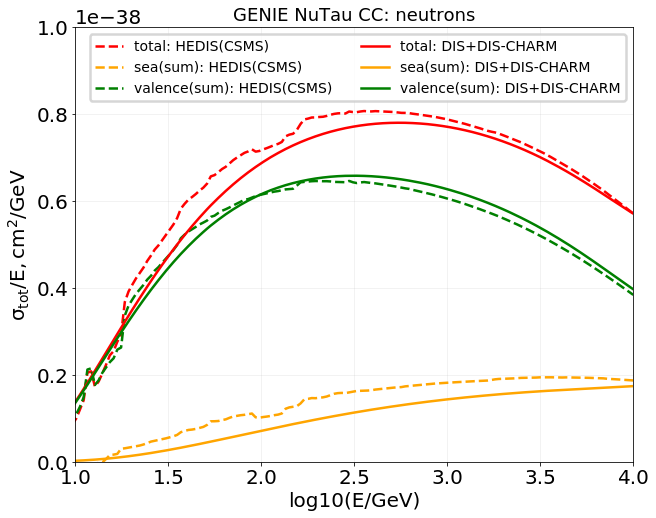

0

In [228]:
plot_both(hedis_fname=hedis_csms,
          v2_fname=g2_file,
          pdg=12, hitN=2112, CC=1)

plot_both(hedis_fname=hedis_csms,
          v2_fname=g2_file,
          pdg=14, hitN=2112, CC=1)

plot_both(hedis_fname=hedis_csms,
          v2_fname=g2_file,
          pdg=16, hitN=2112, CC=1)

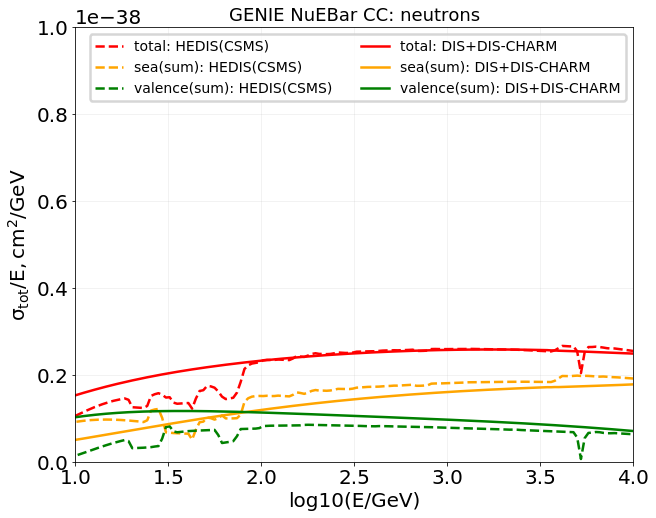

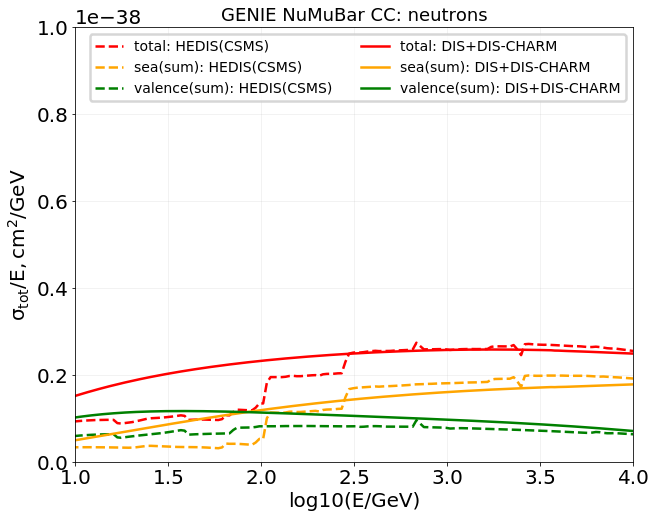

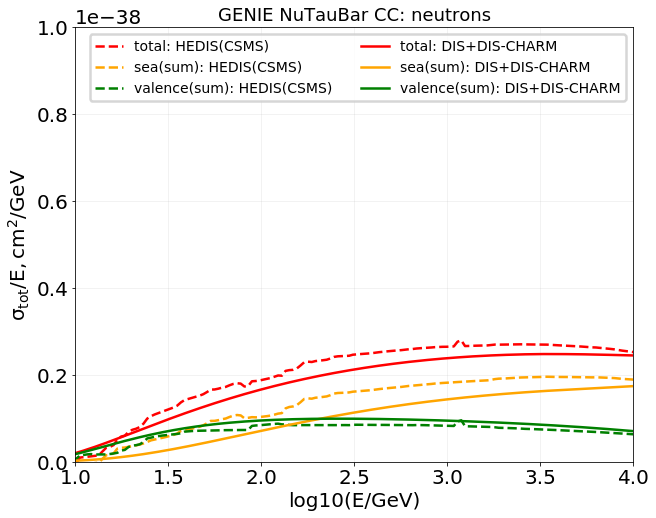

0

In [229]:
plot_both(hedis_fname=hedis_csms,
          v2_fname=g2_file,
          pdg=-12, hitN=2112, CC=1)

plot_both(hedis_fname=hedis_csms,
          v2_fname=g2_file,
          pdg=-14, hitN=2112, CC=1)

plot_both(hedis_fname=hedis_csms,
          v2_fname=g2_file,
          pdg=-16, hitN=2112, CC=1)

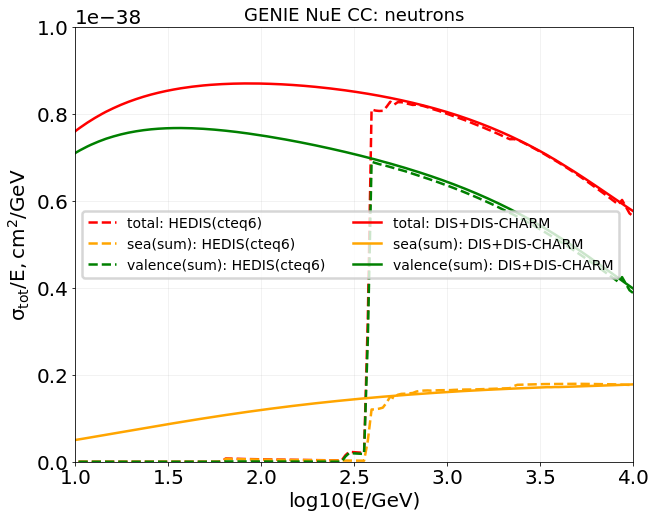

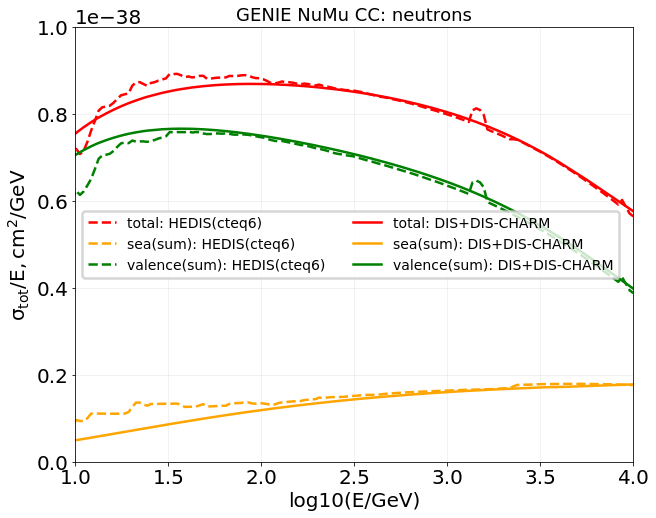

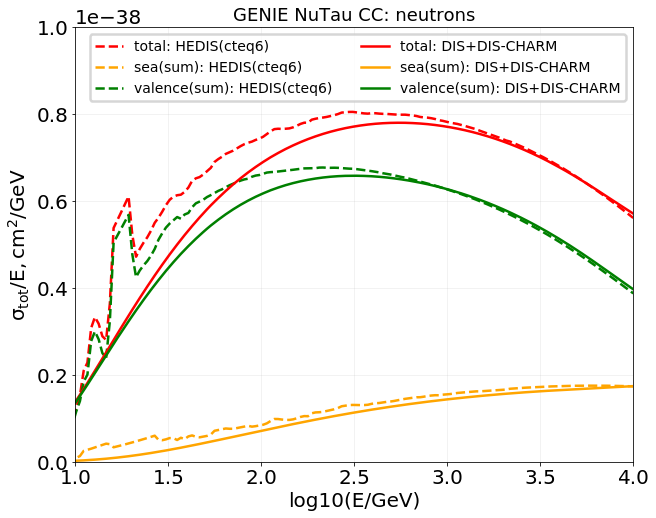

0

In [230]:
plot_both(hedis_fname=hedis_km3net,
          v2_fname=g2_file,
          pdg=12, hitN=2112, CC=1, hedis_model='cteq6')

plot_both(hedis_fname=hedis_km3net,
          v2_fname=g2_file,
          pdg=14, hitN=2112, CC=1, hedis_model='cteq6')

plot_both(hedis_fname=hedis_km3net,
          v2_fname=g2_file,
          pdg=16, hitN=2112, CC=1, hedis_model='cteq6')

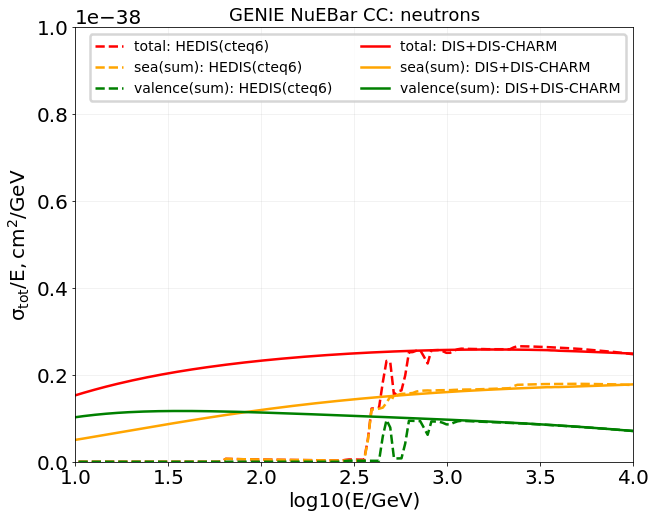

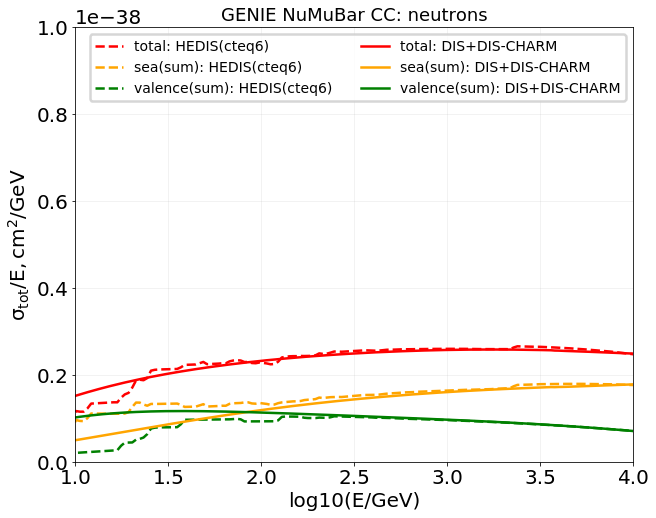

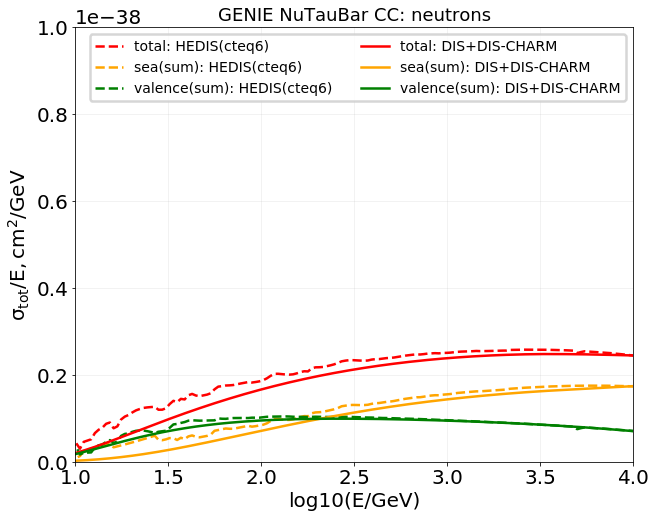

0

In [231]:
plot_both(hedis_fname=hedis_km3net,
          v2_fname=g2_file,
          pdg=-12, hitN=2112, CC=1, hedis_model='cteq6')

plot_both(hedis_fname=hedis_km3net,
          v2_fname=g2_file,
          pdg=-14, hitN=2112, CC=1, hedis_model='cteq6')

plot_both(hedis_fname=hedis_km3net,
          v2_fname=g2_file,
          pdg=-16, hitN=2112, CC=1, hedis_model='cteq6')